# Measuring Pineapple Juice Impact on Quantitative MRI Liver Metrics

In [1]:
# Import libraries
import pandas as pd
from pandas import DataFrame 
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import numpy as np
import dataframe_image as dfi
import statsmodels.api as sm

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
# Get Current directory, if not change to the main directory
import os
if os.getcwd() != '/Users/yi-chunwang/OneDrive - Perspectum Ltd/Work_Repo/PineappleJuice':
    os.chdir('/Users/yi-chunwang/OneDrive - Perspectum Ltd/Work_Repo/PineappleJuice')
print('Current directory is:', os.getcwd())

#Adding time stamp for periodic output

from datetime import datetime
today = datetime.today().strftime('%Y-%m-%d')
print('Late Update:', today)

Current directory is: /Users/yi-chunwang/OneDrive - Perspectum Ltd/Work_Repo/PineappleJuice
Late Update: 2022-02-24


#### Data Specification:
`post` and `pre` folder contain the LMSDiscoverv5 automatic output report files. This was done by Joao\
`Pineapple juice effect.csv` contains the **manual collection** of Portal IDs from Perspectum Portal. This was done by matching the experiment number EXP010; and **manual collection** of metric values was done by going into each report to record them. It had 40 participants data.\
`PJdataframe.csv` contains the 1st phase analysis in which scanner field strength, scanner model and vendor information were not defined. It has 30 participants data.\
`FinalDf.csv` contains the 2ns phase analysis where field strength specific information were further collected by `OrgData.py`. It had 40 participants data.\

#### Analysis Specification:
`PineappleJuiceScript.py` was the analysis for combined data plots, and statistical analysis. It was output to pythone file from `GatherPlot.ipynb`
`OrgData.py` was used to automatically retrieve values from reports in `pre` and `post` folders to generate `FinalDf.csv`\
`VendorSpecificPlots.ipynb` was used on `FinalDf.csv` and plot out field-strength specific plots and descriptive statistics\
Further analysis is done for the metric R1 due to the phenomena that changes in T1 correlate with initial T1 however changes in R1 (reciprocal of T1) do not correlate with initial R1.

Note that it should actually be field-strength specific because these participants were scanned with Siemens scanners but on 1.5T Avantofit and 3T Prisma, not different vendors


# Cleaning

In [4]:
file = "/Users/yi-chunwang/OneDrive - Perspectum Ltd/Work_Repo/PineappleJuice/FinalDF.csv"
read_file = pd.read_csv(file, delimiter = ",", header= 0)
read_file

,Unnamed: 0,Record Id,Portal_ID (Pre PJ),EXP_number (Pre PJ),cT1 median (Pre PJ),Iron median (Pre PJ),PDFF median (Pre PJ),cT1 Q1 (Pre PJ),cT1 Q3 (Pre PJ),Iron Q1 (Pre PJ),Iron Q3 (Pre PJ),PDFF Q1 (Pre PJ),PDFF Q3 (Pre PJ),cT1_Ref_Upper_x,cT1_Ref_Lower_x,Iron_Ref_x,PDFF_Ref_x,vendor_model (Pre PJ),field_strength (Pre PJ),Portal_ID (Post PJ),EXP_number (Post PJ),cT1 median (Post PJ),Iron median (Post PJ),PDFF median (Post PJ),cT1 Q1 (Post PJ),cT1 Q3 (Post PJ),Iron Q1 (Post PJ),Iron Q3 (Post PJ),PDFF Q1 (Post PJ),PDFF Q3 (Post PJ),cT1_Ref_Upper_y,cT1_Ref_Lower_y,Iron_Ref_y,PDFF_Ref_y,vendor_model (Post PJ),field_strength (Post PJ)
0,0,EXP010_002,11947,EXP010vhobplp,654.0,1.1,4.9,626.0,695.0,1.1,1.2,3.9,5.9,633.0,794.0,1.8,5.6,SIEMENSPrisma,3T,9827,EXP010kfnnfem,698.0,1.2,4.8,668.0,735.0,1.1,1.2,3.8,5.9,633.0,794.0,1.8,5.6,SIEMENSPrisma,3T
1,1,EXP010_003,9625,EXP010vetygxw,667.0,1.1,6.1,643.0,701.0,1.1,1.2,4.7,7.5,633.0,794.0,1.8,5.6,SIEMENSAvanto_ﬁt,.5T,9623,EXP010nzjwutv,661.0,1.0,5.5,640.0,696.0,1.0,1.1,4.1,7.0,633.0,794.0,1.8,5.6,SIEMENSAvanto_ﬁt,.5T
2,2,EXP010_004,9834,EXP010vkcrjqc,836.0,1.0,1.9,808.0,881.0,1.0,1.1,1.1,2.8,633.0,794.0,1.8,5.6,SIEMENSPrisma,3T,9830,EXP010ooxyfwn,838.0,0.8,1.9,810.0,881.0,0.8,0.8,1.1,2.7,633.0,794.0,1.8,5.6,SIEMENSPrisma,3T
3,3,EXP010_005,9818,EXP010vpitawu,826.0,1.0,1.2,793.0,875.0,0.9,1.1,0.1,2.4,633.0,794.0,1.8,5.6,SIEMENSAvanto_ﬁt,.5T,9816,EXP010otlxkrz,816.0,1.0,1.6,786.0,867.0,0.9,1.0,0.4,3.1,633.0,794.0,1.8,5.6,SIEMENSAvanto_ﬁt,.5T
4,4,EXP010_006,9843,EXP010vuvdody,638.0,1.1,3.6,614.0,675.0,1.0,1.2,2.4,4.8,633.0,794.0,1.8,5.6,SIEMENSPrisma,3T,9840,EXP010ochlmjx,644.0,1.1,2.6,616.0,678.0,1.1,1.2,1.6,3.8,633.0,794.0,1.8,5.6,SIEMENSPrisma,3T
5,5,EXP010_007,9820,EXP010woaclvx,658.0,1.1,1.3,633.0,699.0,1.0,1.1,0.0,2.8,633.0,794.0,1.8,5.6,SIEMENSAvanto_ﬁt,.5T,9814,EXP010ogwfklv,653.0,1.1,1.3,632.0,688.0,1.0,1.1,0.0,2.7,633.0,794.0,1.8,5.6,SIEMENSAvanto_ﬁt,.5T
6,6,EXP010_008,9618,EXP010wktzdls,823.0,0.9,1.6,780.0,861.0,0.9,1.0,0.9,2.4,633.0,794.0,1.8,5.6,SIEMENSPrisma,3T,9616,EXP010olbctkw,801.0,0.8,2.1,764.0,842.0,0.8,0.9,1.3,3.1,633.0,794.0,1.8,5.6,SIEMENSPrisma,3T
7,7,EXP010_009,9819,EXP010waxoiey,615.0,1.3,1.7,597.0,652.0,1.2,1.3,0.2,3.1,633.0,794.0,1.8,5.6,SIEMENSAvanto_ﬁt,.5T,9815,EXP010opqcxxj,621.0,1.4,1.6,600.0,656.0,1.3,1.5,0.0,3.1,633.0,794.0,1.8,5.6,SIEMENSAvanto_ﬁt,.5T
8,8,EXP010_011,9962,EXP010wlnocav,962.0,1.3,21.0,883.0,103.0,1.3,1.4,20.0,-23.0,633.0,794.0,1.8,5.6,SIEMENSPrisma,3T,9958,EXP010oyklrkq,983.0,1.4,21.0,917.0,104.0,1.3,1.4,19.0,-22.0,633.0,794.0,1.8,5.6,SIEMENSPrisma,3T
9,9,EXP010_012,9973,EXP010wrtonqh,688.0,1.0,3.4,664.0,722.0,1.0,1.0,1.5,5.3,633.0,794.0,1.8,5.6,SIEMENSPrisma,3T,9971,EXP010pzugyag,717.0,1.0,2.0,692.0,749.0,1.0,1.0,0.9,3.3,633.0,794.0,1.8,5.6,SIEMENSPrisma,3T


In [5]:
# See the detail of the dataframe 'read_file'
read_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                40 non-null     int64  
 1   Record Id                 40 non-null     object 
 2   Portal_ID (Pre PJ)        40 non-null     object 
 3   EXP_number (Pre PJ)       31 non-null     object 
 4   cT1 median (Pre PJ)       31 non-null     float64
 5   Iron median (Pre PJ)      31 non-null     float64
 6   PDFF median (Pre PJ)      31 non-null     float64
 7   cT1 Q1 (Pre PJ)           31 non-null     float64
 8   cT1 Q3 (Pre PJ)           31 non-null     float64
 9   Iron Q1 (Pre PJ)          31 non-null     float64
 10  Iron Q3 (Pre PJ)          31 non-null     float64
 11  PDFF Q1 (Pre PJ)          31 non-null     float64
 12  PDFF Q3 (Pre PJ)          31 non-null     float64
 13  cT1_Ref_Upper_x           31 non-null     float64
 14  cT1_Ref_Lowe

In [6]:
# drop the NaN columns
drop_columns = read_file.drop(labels = None, axis = 1, columns = ['Unnamed: 0', 'cT1_Ref_Upper_x', 'cT1_Ref_Lower_x', 'Iron_Ref_x', 'PDFF_Ref_x']) 
drop_columns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Record Id                 40 non-null     object 
 1   Portal_ID (Pre PJ)        40 non-null     object 
 2   EXP_number (Pre PJ)       31 non-null     object 
 3   cT1 median (Pre PJ)       31 non-null     float64
 4   Iron median (Pre PJ)      31 non-null     float64
 5   PDFF median (Pre PJ)      31 non-null     float64
 6   cT1 Q1 (Pre PJ)           31 non-null     float64
 7   cT1 Q3 (Pre PJ)           31 non-null     float64
 8   Iron Q1 (Pre PJ)          31 non-null     float64
 9   Iron Q3 (Pre PJ)          31 non-null     float64
 10  PDFF Q1 (Pre PJ)          31 non-null     float64
 11  PDFF Q3 (Pre PJ)          31 non-null     float64
 12  vendor_model (Pre PJ)     31 non-null     object 
 13  field_strength (Pre PJ)   31 non-null     object 
 14  Portal_ID (P

In [7]:
#drop the rows with NaN  `axis = 0`` means to drop `rows` which contain "any" missing values
drop_row = drop_columns.dropna(axis = 0)
drop_row.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30 entries, 0 to 39
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Record Id                 30 non-null     object 
 1   Portal_ID (Pre PJ)        30 non-null     object 
 2   EXP_number (Pre PJ)       30 non-null     object 
 3   cT1 median (Pre PJ)       30 non-null     float64
 4   Iron median (Pre PJ)      30 non-null     float64
 5   PDFF median (Pre PJ)      30 non-null     float64
 6   cT1 Q1 (Pre PJ)           30 non-null     float64
 7   cT1 Q3 (Pre PJ)           30 non-null     float64
 8   Iron Q1 (Pre PJ)          30 non-null     float64
 9   Iron Q3 (Pre PJ)          30 non-null     float64
 10  PDFF Q1 (Pre PJ)          30 non-null     float64
 11  PDFF Q3 (Pre PJ)          30 non-null     float64
 12  vendor_model (Pre PJ)     30 non-null     object 
 13  field_strength (Pre PJ)   30 non-null     object 
 14  Portal_ID (P

# Groupby Field Strength

In [8]:
groupby = [x for _, x in drop_row.groupby('vendor_model (Pre PJ)')]
AV = groupby[0]
PA = groupby[1]

In [9]:
# Descriptive Statistics for 3T data for PJ Exp
# AV.info()
tmp = [
AV['Iron median (Pre PJ)'].median(),
AV['Iron median (Post PJ)'].median(),
AV['PDFF median (Pre PJ)'].median(),
AV['PDFF median (Post PJ)'].median(),
PA['Iron median (Pre PJ)'].median(),
PA['Iron median (Post PJ)'].median(),
PA['PDFF median (Pre PJ)'].median(),
PA['PDFF median (Post PJ)'].median()
]

tmp
#AV.describe()

[1.1, 1.1, 1.7, 1.6, 1.0, 1.0, 3.1, 2.6]

In [12]:
# Get a summary of Prisma 3T unique object entries
PA.describe(exclude=[np.number])

,Record Id,Portal_ID (Pre PJ),EXP_number (Pre PJ),vendor_model (Pre PJ),field_strength (Pre PJ),Portal_ID (Post PJ),EXP_number (Post PJ),vendor_model (Post PJ),field_strength (Post PJ)
count,17,17,17,17,17,17,17,17,17
unique,17,17,17,1,1,17,17,1,1
top,EXP010_006,11392,Exp010Zcimduw,SIEMENSPrisma,3T,11377,EXP010qbcnicl,SIEMENSPrisma,3T
freq,1,1,1,17,17,1,1,17,17


In [10]:
# Descriptive Statistics for 3T data. the include='all' argument includes all datatype: numeric, object, categorical, datetime
PA_des = PA.describe(include = 'all').round(1)

# describe cT1
print('There are in total', PA_des['Record Id']['count'] ,'participants being scanned under 3T SIEMENSPrisma scanner. Each participant had their unique entry meaning that no one was scanned twice. The population mean value of median cT1 before pineapple juice ingestion is',  PA_des['cT1 median (Pre PJ)']['mean'], '(ms) while the population median value of median cT1 before pineapple juice ingestion is', PA_des['cT1 median (Pre PJ)']['50%'],'(ms). In the case of after pineapple juice ingestion, the population mean value of median cT1 is',  PA_des['cT1 median (Post PJ)']['mean'], '(ms) and population median value of median cT1 is', PA_des['cT1 median (Post PJ)']['50%'],'(ms).')

# describe Iron
print('The population mean value of median Iron before pineapple juice ingestion is',  PA_des['Iron median (Pre PJ)']['mean'], '(mg/g dry liver) while the population median value of median Iron before pineapple juice ingestion is', PA_des['Iron median (Pre PJ)']['50%'],'(mg/g dry liver). In the case of after pineapple juice ingestion, the population mean value of median Iron is',  PA_des['Iron median (Post PJ)']['mean'], '(mg/g dry liver) and population median value of median Iron is', PA_des['Iron median (Post PJ)']['50%'],'(mg/g dry liver); suggesting there is no difference between Iron(Pre PJ) and Iron(Post PJ)')

# describe PDFF
print('The population mean value of median PDFF before pineapple juice ingestion is',  PA_des['PDFF median (Pre PJ)']['mean'], '(%) while the population median value of median PDFF before pineapple juice ingestion is', PA_des['PDFF median (Pre PJ)']['50%'],'(%). In the case of after pineapple juice ingestion, the population mean value of median PDFF is',  PA_des['PDFF median (Post PJ)']['mean'], '(%) and population median value of median PDFF is', PA_des['PDFF median (Post PJ)']['50%'],'(%).')
PA_des

There are in total 17 participants being scanned under 3T SIEMENSPrisma scanner. Each participant had their unique entry meaning that no one was scanned twice. The population mean value of median cT1 before pineapple juice ingestion is 736.9 (ms) while the population median value of median cT1 before pineapple juice ingestion is 727.0 (ms). In the case of after pineapple juice ingestion, the population mean value of median cT1 is 756.2 (ms) and population median value of median cT1 is 753.0 (ms).
The population mean value of median Iron before pineapple juice ingestion is 1.1 (mg/g dry liver) while the population median value of median Iron before pineapple juice ingestion is 1.0 (mg/g dry liver). In the case of after pineapple juice ingestion, the population mean value of median Iron is 1.1 (mg/g dry liver) and population median value of median Iron is 1.0 (mg/g dry liver); suggesting there is no difference between Iron(Pre PJ) and Iron(Post PJ)
The population mean value of median PDF

,Record Id,Portal_ID (Pre PJ),EXP_number (Pre PJ),cT1 median (Pre PJ),Iron median (Pre PJ),PDFF median (Pre PJ),cT1 Q1 (Pre PJ),cT1 Q3 (Pre PJ),Iron Q1 (Pre PJ),Iron Q3 (Pre PJ),PDFF Q1 (Pre PJ),PDFF Q3 (Pre PJ),vendor_model (Pre PJ),field_strength (Pre PJ),Portal_ID (Post PJ),EXP_number (Post PJ),cT1 median (Post PJ),Iron median (Post PJ),PDFF median (Post PJ),cT1 Q1 (Post PJ),cT1 Q3 (Post PJ),Iron Q1 (Post PJ),Iron Q3 (Post PJ),PDFF Q1 (Post PJ),PDFF Q3 (Post PJ),cT1_Ref_Upper_y,cT1_Ref_Lower_y,Iron_Ref_y,PDFF_Ref_y,vendor_model (Post PJ),field_strength (Post PJ)
count,17,17,17,17.0,17.0,17.0,17.0,17.0,17.0,17.0,17.0,17.0,17,17,17,17,17.0,17.0,17.0,17.0,17.0,17.0,17.0,17.0,17.0,17.0,17.0,17.0,17.0,17,17
unique,17,17,17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,17,17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1
top,EXP010_006,11392,Exp010Zcimduw,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SIEMENSPrisma,3T,11377,EXP010qbcnicl,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SIEMENSPrisma,3T
freq,1,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17,17,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17,17
mean,NaN,NaN,NaN,736.9,1.1,4.1,705.1,725.0,1.0,1.2,3.0,2.7,NaN,NaN,NaN,NaN,756.2,1.1,3.9,724.3,743.5,1.0,1.2,2.8,2.4,633.0,794.0,1.8,5.6,NaN,NaN
std,NaN,NaN,NaN,81.6,0.4,4.4,71.8,169.8,0.4,0.4,4.4,6.7,NaN,NaN,NaN,NaN,79.8,0.4,4.5,72.9,173.3,0.3,0.5,4.3,6.4,0.0,0.0,0.0,0.0,NaN,NaN
min,NaN,NaN,NaN,637.0,0.8,1.6,604.0,103.0,0.7,0.8,0.9,-23.0,NaN,NaN,NaN,NaN,644.0,0.8,1.5,614.0,104.0,0.7,0.8,0.4,-22.0,633.0,794.0,1.8,5.6,NaN,NaN
25%,NaN,NaN,NaN,684.0,1.0,2.6,660.0,713.0,0.9,1.0,1.5,3.3,NaN,NaN,NaN,NaN,698.0,0.9,2.1,670.0,732.0,0.8,0.9,1.3,3.0,633.0,794.0,1.8,5.6,NaN,NaN
50%,NaN,NaN,NaN,727.0,1.0,3.1,701.0,759.0,1.0,1.1,1.9,4.2,NaN,NaN,NaN,NaN,753.0,1.0,2.6,723.0,783.0,1.0,1.1,1.8,3.4,633.0,794.0,1.8,5.6,NaN,NaN
75%,NaN,NaN,NaN,761.0,1.1,3.6,735.0,795.0,1.0,1.2,2.4,4.9,NaN,NaN,NaN,NaN,796.0,1.1,3.7,760.0,820.0,1.0,1.2,2.6,4.8,633.0,794.0,1.8,5.6,NaN,NaN


In [19]:
PA.describe(exclude=['category','datetime']) # use a list of dtype to include or exclude in the summary

,Record Id,Portal_ID (Pre PJ),EXP_number (Pre PJ),cT1 median (Pre PJ),Iron median (Pre PJ),PDFF median (Pre PJ),cT1 Q1 (Pre PJ),cT1 Q3 (Pre PJ),Iron Q1 (Pre PJ),Iron Q3 (Pre PJ),PDFF Q1 (Pre PJ),PDFF Q3 (Pre PJ),vendor_model (Pre PJ),field_strength (Pre PJ),Portal_ID (Post PJ),EXP_number (Post PJ),cT1 median (Post PJ),Iron median (Post PJ),PDFF median (Post PJ),cT1 Q1 (Post PJ),cT1 Q3 (Post PJ),Iron Q1 (Post PJ),Iron Q3 (Post PJ),PDFF Q1 (Post PJ),PDFF Q3 (Post PJ),cT1_Ref_Upper_y,cT1_Ref_Lower_y,Iron_Ref_y,PDFF_Ref_y,vendor_model (Post PJ),field_strength (Post PJ)
count,17,17,17,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17,17,17,17,17.000000,17.00000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.0,17.0,17.0,17.0,17,17
unique,17,17,17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,17,17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1
top,EXP010_006,11392,Exp010Zcimduw,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SIEMENSPrisma,3T,11377,EXP010qbcnicl,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SIEMENSPrisma,3T
freq,1,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17,17,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17,17
mean,NaN,NaN,NaN,736.882353,1.100000,4.123529,705.058824,725.000000,1.035294,1.176471,3.005882,2.682353,NaN,NaN,NaN,NaN,756.176471,1.10000,3.900000,724.294118,743.529412,1.011765,1.164706,2.800000,2.441176,633.0,794.0,1.8,5.6,NaN,NaN
std,NaN,NaN,NaN,81.558938,0.382426,4.435162,71.841380,169.786631,0.353449,0.419120,4.446272,6.695543,NaN,NaN,NaN,NaN,79.836736,0.44441,4.514421,72.917560,173.276556,0.340739,0.479506,4.259695,6.399810,0.0,0.0,0.0,0.0,NaN,NaN
min,NaN,NaN,NaN,637.000000,0.800000,1.600000,604.000000,103.000000,0.700000,0.800000,0.900000,-23.000000,NaN,NaN,NaN,NaN,644.000000,0.80000,1.500000,614.000000,104.000000,0.700000,0.800000,0.400000,-22.000000,633.0,794.0,1.8,5.6,NaN,NaN
25%,NaN,NaN,NaN,684.000000,1.000000,2.600000,660.000000,713.000000,0.900000,1.000000,1.500000,3.300000,NaN,NaN,NaN,NaN,698.000000,0.90000,2.100000,670.000000,732.000000,0.800000,0.900000,1.300000,3.000000,633.0,794.0,1.8,5.6,NaN,NaN
50%,NaN,NaN,NaN,727.000000,1.000000,3.100000,701.000000,759.000000,1.000000,1.100000,1.900000,4.200000,NaN,NaN,NaN,NaN,753.000000,1.00000,2.600000,723.000000,783.000000,1.000000,1.100000,1.800000,3.400000,633.0,794.0,1.8,5.6,NaN,NaN
75%,NaN,NaN,NaN,761.000000,1.100000,3.600000,735.000000,795.000000,1.000000,1.200000,2.400000,4.900000,NaN,NaN,NaN,NaN,796.000000,1.10000,3.700000,760.000000,820.000000,1.000000,1.200000,2.600000,4.800000,633.0,794.0,1.8,5.6,NaN,NaN


In [20]:
# Descriptive Statistics for 1.5T data and exclude numeric columns 
AV_des = AV.describe(exclude=[np.number])
record_entry = ', '.join(list(AV_des.columns))

print('There are some parameters are categorical or record data:', record_entry, '. The count and unique in the descriptive statistics table below indicated that there are', AV_des['Record Id']['count'], 'participants were scanned with', AV_des['vendor_model (Pre PJ)']['top'], 'scanner and each of them provide unique value.')
AV_des

There are some parameters are categorical or record data: Record Id, Portal_ID (Pre PJ), EXP_number (Pre PJ), vendor_model (Pre PJ), field_strength (Pre PJ), Portal_ID (Post PJ), EXP_number (Post PJ), vendor_model (Post PJ), field_strength (Post PJ) . The count and unique in the descriptive statistics table below indicated that there are 13 participants were scanned with SIEMENSAvanto_ﬁt scanner and each of them provide unique value.


,Record Id,Portal_ID (Pre PJ),EXP_number (Pre PJ),vendor_model (Pre PJ),field_strength (Pre PJ),Portal_ID (Post PJ),EXP_number (Post PJ),vendor_model (Post PJ),field_strength (Post PJ)
count,13,13,13,13,13,13,13,13,13
unique,13,13,13,1,1,13,13,1,1
top,EXP010_009,9820,Exp010Zwbadsj,SIEMENSAvanto_ﬁt,.5T,10726,Exp010Oufxzps,SIEMENSAvanto_ﬁt,.5T
freq,1,1,1,13,13,1,1,13,13


In [48]:
# Compute cR1 for 3T Prisma data
PA['cR1 median (Pre PJ)'] = 1/PA['cT1 median (Pre PJ)']
PA['cR1 median (Post PJ)'] = 1/PA['cT1 median (Post PJ)']
PA

,Record Id,Portal_ID (Pre PJ),EXP_number (Pre PJ),cT1 median (Pre PJ),Iron median (Pre PJ),PDFF median (Pre PJ),cT1 Q1 (Pre PJ),cT1 Q3 (Pre PJ),Iron Q1 (Pre PJ),Iron Q3 (Pre PJ),PDFF Q1 (Pre PJ),PDFF Q3 (Pre PJ),vendor_model (Pre PJ),field_strength (Pre PJ),Portal_ID (Post PJ),EXP_number (Post PJ),cT1 median (Post PJ),Iron median (Post PJ),PDFF median (Post PJ),cT1 Q1 (Post PJ),cT1 Q3 (Post PJ),Iron Q1 (Post PJ),Iron Q3 (Post PJ),PDFF Q1 (Post PJ),PDFF Q3 (Post PJ),cT1_Ref_Upper_y,cT1_Ref_Lower_y,Iron_Ref_y,PDFF_Ref_y,vendor_model (Post PJ),field_strength (Post PJ),cR1 median (Pre PJ),cR1 median (Post PJ)
0,EXP010_002,11947,EXP010vhobplp,654.0,1.1,4.9,626.0,695.0,1.1,1.2,3.9,5.9,SIEMENSPrisma,3T,9827,EXP010kfnnfem,698.0,1.2,4.8,668.0,735.0,1.1,1.2,3.8,5.9,633.0,794.0,1.8,5.6,SIEMENSPrisma,3T,0.001529,0.001433
2,EXP010_004,9834,EXP010vkcrjqc,836.0,1.0,1.9,808.0,881.0,1.0,1.1,1.1,2.8,SIEMENSPrisma,3T,9830,EXP010ooxyfwn,838.0,0.8,1.9,810.0,881.0,0.8,0.8,1.1,2.7,633.0,794.0,1.8,5.6,SIEMENSPrisma,3T,0.001196,0.001193
4,EXP010_006,9843,EXP010vuvdody,638.0,1.1,3.6,614.0,675.0,1.0,1.2,2.4,4.8,SIEMENSPrisma,3T,9840,EXP010ochlmjx,644.0,1.1,2.6,616.0,678.0,1.1,1.2,1.6,3.8,633.0,794.0,1.8,5.6,SIEMENSPrisma,3T,0.001567,0.001553
6,EXP010_008,9618,EXP010wktzdls,823.0,0.9,1.6,780.0,861.0,0.9,1.0,0.9,2.4,SIEMENSPrisma,3T,9616,EXP010olbctkw,801.0,0.8,2.1,764.0,842.0,0.8,0.9,1.3,3.1,633.0,794.0,1.8,5.6,SIEMENSPrisma,3T,0.001215,0.001248
8,EXP010_011,9962,EXP010wlnocav,962.0,1.3,21.0,883.0,103.0,1.3,1.4,20.0,-23.0,SIEMENSPrisma,3T,9958,EXP010oyklrkq,983.0,1.4,21.0,917.0,104.0,1.3,1.4,19.0,-22.0,633.0,794.0,1.8,5.6,SIEMENSPrisma,3T,0.001040,0.001017
9,EXP010_012,9973,EXP010wrtonqh,688.0,1.0,3.4,664.0,722.0,1.0,1.0,1.5,5.3,SIEMENSPrisma,3T,9971,EXP010pzugyag,717.0,1.0,2.0,692.0,749.0,1.0,1.0,0.9,3.3,633.0,794.0,1.8,5.6,SIEMENSPrisma,3T,0.001453,0.001395
11,EXP010_014,9964,EXP010xresjqh,712.0,1.0,3.1,683.0,753.0,0.9,1.2,1.9,4.5,SIEMENSPrisma,3T,9959,EXP010pbukhnp,695.0,1.0,2.9,668.0,732.0,1.0,1.1,1.9,4.2,633.0,794.0,1.8,5.6,SIEMENSPrisma,3T,0.001404,0.001439
12,EXP010_015,9965,EXP010xukgukr,684.0,1.0,2.6,660.0,719.0,1.0,1.1,1.5,3.8,SIEMENSPrisma,3T,9960,EXP010pgarsgq,732.0,1.2,4.2,700.0,770.0,1.0,1.3,2.6,5.7,633.0,794.0,1.8,5.6,SIEMENSPrisma,3T,0.001462,0.001366
16,EXP010_019,10166,EXP010xsnkfaa,637.0,2.5,4.6,604.0,711.0,2.3,2.7,3.2,6.0,SIEMENSPrisma,3T,10164,EXP010pyrnfmw,649.0,2.7,4.2,614.0,723.0,2.2,2.9,2.7,5.8,633.0,794.0,1.8,5.6,SIEMENSPrisma,3T,0.001570,0.001541
17,EXP010_020,10181,EXP010xyhlgie,742.0,1.0,3.8,717.0,777.0,0.9,1.0,2.6,4.9,SIEMENSPrisma,3T,10178,EXP010qgnaouz,748.0,0.9,3.7,723.0,783.0,0.8,0.9,2.7,4.8,633.0,794.0,1.8,5.6,SIEMENSPrisma,3T,0.001348,0.001337


In [49]:
# Compute cR1 for 1.5T Avantofit data
AV['cR1 median (Pre PJ)'] = 1/AV['cT1 median (Pre PJ)']
AV['cR1 median (Post PJ)'] = 1/AV['cT1 median (Post PJ)']
AV

,Record Id,Portal_ID (Pre PJ),EXP_number (Pre PJ),cT1 median (Pre PJ),Iron median (Pre PJ),PDFF median (Pre PJ),cT1 Q1 (Pre PJ),cT1 Q3 (Pre PJ),Iron Q1 (Pre PJ),Iron Q3 (Pre PJ),PDFF Q1 (Pre PJ),PDFF Q3 (Pre PJ),vendor_model (Pre PJ),field_strength (Pre PJ),Portal_ID (Post PJ),EXP_number (Post PJ),cT1 median (Post PJ),Iron median (Post PJ),PDFF median (Post PJ),cT1 Q1 (Post PJ),cT1 Q3 (Post PJ),Iron Q1 (Post PJ),Iron Q3 (Post PJ),PDFF Q1 (Post PJ),PDFF Q3 (Post PJ),cT1_Ref_Upper_y,cT1_Ref_Lower_y,Iron_Ref_y,PDFF_Ref_y,vendor_model (Post PJ),field_strength (Post PJ),cR1 median (Pre PJ),cR1 median (Post PJ)
1,EXP010_003,9625,EXP010vetygxw,667.0,1.1,6.1,643.0,701.0,1.1,1.2,4.7,7.5,SIEMENSAvanto_ﬁt,.5T,9623,EXP010nzjwutv,661.0,1.0,5.5,640.0,696.0,1.0,1.1,4.1,7.0,633.0,794.0,1.8,5.6,SIEMENSAvanto_ﬁt,.5T,0.001499,0.001513
3,EXP010_005,9818,EXP010vpitawu,826.0,1.0,1.2,793.0,875.0,0.9,1.1,0.1,2.4,SIEMENSAvanto_ﬁt,.5T,9816,EXP010otlxkrz,816.0,1.0,1.6,786.0,867.0,0.9,1.0,0.4,3.1,633.0,794.0,1.8,5.6,SIEMENSAvanto_ﬁt,.5T,0.001211,0.001225
5,EXP010_007,9820,EXP010woaclvx,658.0,1.1,1.3,633.0,699.0,1.0,1.1,0.0,2.8,SIEMENSAvanto_ﬁt,.5T,9814,EXP010ogwfklv,653.0,1.1,1.3,632.0,688.0,1.0,1.1,0.0,2.7,633.0,794.0,1.8,5.6,SIEMENSAvanto_ﬁt,.5T,0.001520,0.001531
7,EXP010_009,9819,EXP010waxoiey,615.0,1.3,1.7,597.0,652.0,1.2,1.3,0.2,3.1,SIEMENSAvanto_ﬁt,.5T,9815,EXP010opqcxxj,621.0,1.4,1.6,600.0,656.0,1.3,1.5,0.0,3.1,633.0,794.0,1.8,5.6,SIEMENSAvanto_ﬁt,.5T,0.001626,0.001610
13,EXP010_016,9938,EXP010xcidtzf,685.0,1.1,2.3,662.0,722.0,1.0,1.1,0.6,4.4,SIEMENSAvanto_ﬁt,.5T,9932,EXP010pkplxry,710.0,1.0,1.9,684.0,753.0,0.9,1.0,0.4,3.8,633.0,794.0,1.8,5.6,SIEMENSAvanto_ﬁt,.5T,0.001460,0.001408
14,EXP010_017,9939,EXP010xhwjezc,666.0,1.2,1.0,646.0,699.0,1.2,1.3,0.0,2.2,SIEMENSAvanto_ﬁt,.5T,9933,EXP010ppzojig,680.0,1.1,1.1,661.0,711.0,1.1,1.1,0.0,2.4,633.0,794.0,1.8,5.6,SIEMENSAvanto_ﬁt,.5T,0.001502,0.001471
15,EXP010_018,9940,EXP010xnqqfxi,733.0,1.1,1.3,710.0,766.0,1.1,1.2,0.1,2.7,SIEMENSAvanto_ﬁt,.5T,9945,EXP010ptkyvkf,753.0,1.1,1.2,732.0,785.0,1.1,1.1,0.0,2.7,633.0,794.0,1.8,5.6,SIEMENSAvanto_ﬁt,.5T,0.001364,0.001328
20,EXP010_023,10141,EXP010yeubkrf,727.0,0.9,2.4,700.0,767.0,0.9,1.0,1.1,3.9,SIEMENSAvanto_ﬁt,.5T,10136,EXP010qfsrhca,735.0,0.9,2.2,711.0,778.0,0.9,1.0,0.8,3.7,633.0,794.0,1.8,5.6,SIEMENSAvanto_ﬁt,.5T,0.001376,0.001361
22,EXP010_025,10156,EXP010ypjqucg,693.0,1.1,5.0,667.0,725.0,1.1,1.2,3.5,6.6,SIEMENSAvanto_ﬁt,.5T,10150,EXP010qopnvaq,725.0,1.1,4.8,701.0,762.0,1.0,1.2,3.4,6.4,633.0,794.0,1.8,5.6,SIEMENSAvanto_ﬁt,.5T,0.001443,0.001379
27,EXP010_030,10723,Exp010Zgntdcr,792.0,1.2,17.0,759.0,836.0,1.2,1.3,15.0,-19.0,SIEMENSAvanto_ﬁt,.5T,10726,Exp010Raztyee,804.0,1.3,17.0,770.0,847.0,1.2,1.3,15.0,-19.0,633.0,794.0,1.8,5.6,SIEMENSAvanto_ﬁt,.5T,0.001263,0.001244


# Explore Distribution

### Box Plot

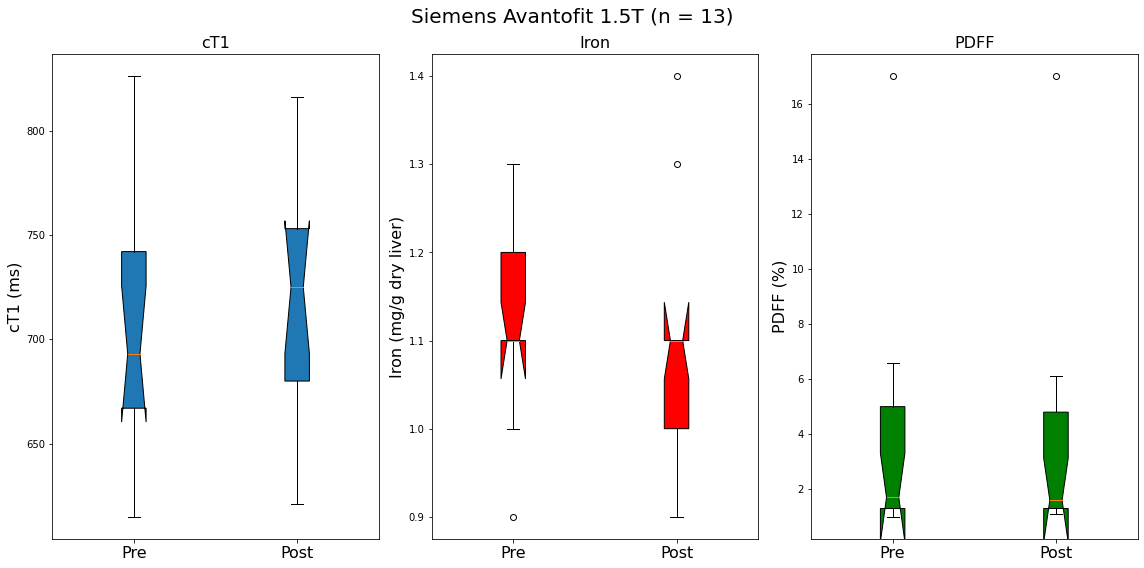

In [24]:
# Plor box plot to see the distributiont of the paried values.
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (16,8))
fig.suptitle('Siemens Avantofit 1.5T (n = 13)', fontsize = 20)

axes[0].boxplot([AV["cT1 median (Pre PJ)"],AV["cT1 median (Post PJ)"]], patch_artist = True, notch = True)
axes[0].set_title("cT1", fontsize = 16)
axes[0].set_ylabel("cT1 (ms)", fontsize = 16)
axes[0].set_xticklabels(['Pre', 'Post'], fontsize = 16)

axes[1].boxplot([AV["Iron median (Pre PJ)"],AV["Iron median (Post PJ)"]], patch_artist = True, notch = True, boxprops = dict(facecolor = 'red'))
axes[1].set_title("Iron", fontsize = 16)
axes[1].set_ylabel("Iron (mg/g dry liver)", fontsize = 16)
axes[1].set_xticklabels(['Pre', 'Post'], fontsize = 16)

axes[2].boxplot([AV["PDFF median (Pre PJ)"],AV["PDFF median (Post PJ)"]], patch_artist = True, notch = True, boxprops = dict(facecolor = 'green'))
axes[2].set_title("PDFF", fontsize = 16)
axes[2].set_ylabel("PDFF (%)", fontsize = 16)
axes[2].set_xticklabels(['Pre', 'Post'], fontsize = 16)
plt.tight_layout()
#plt.savefig("AV Box.png")

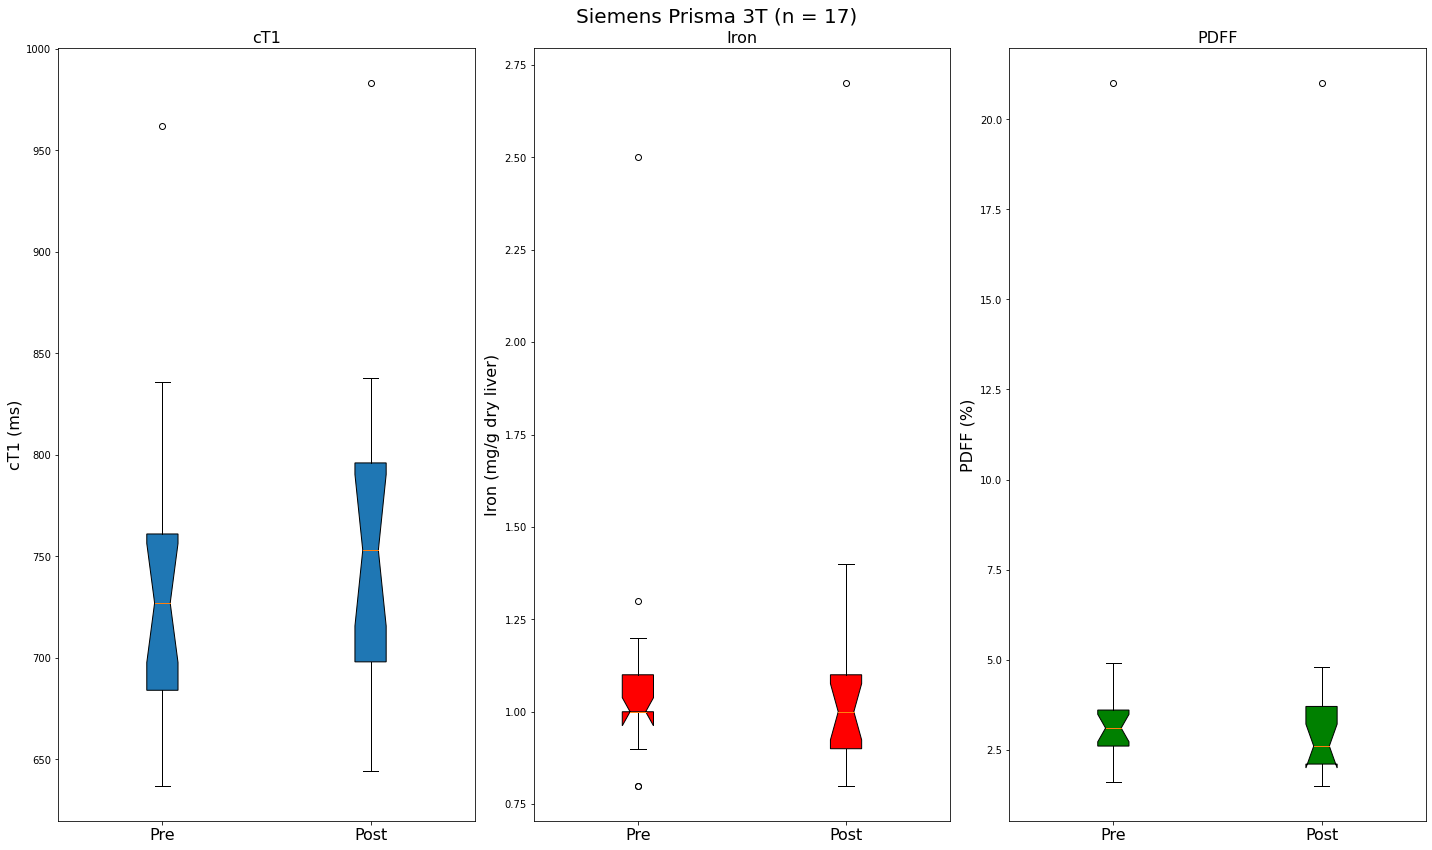

In [65]:
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (20,12))
fig.suptitle('Siemens Prisma 3T (n = 17)', fontsize = 20)

axes[0].boxplot([PA["cT1 median (Pre PJ)"],PA["cT1 median (Post PJ)"]], patch_artist = True, notch = True)
axes[0].set_title("cT1", fontsize = 16)
axes[0].set_ylabel("cT1 (ms)", fontsize = 16)
axes[0].set_xticklabels(['Pre', 'Post'], fontsize = 16)

axes[1].boxplot([PA["Iron median (Pre PJ)"],PA["Iron median (Post PJ)"]], patch_artist = True, notch = True, boxprops = dict(facecolor = 'red'))
axes[1].set_title("Iron", fontsize = 16)
axes[1].set_ylabel("Iron (mg/g dry liver)", fontsize = 16)
axes[1].set_xticklabels(['Pre', 'Post'], fontsize = 16)

axes[2].boxplot([PA["PDFF median (Pre PJ)"],PA["PDFF median (Post PJ)"]], patch_artist = True, notch = True, boxprops = dict(facecolor = 'green'))
axes[2].set_title("PDFF", fontsize = 16)
axes[2].set_ylabel("PDFF (%)", fontsize = 16)
axes[2].set_xticklabels(['Pre', 'Post'], fontsize = 16)
plt.tight_layout()
#plt.savefig("PA Box.png")

There was a outlier in the cR1 metric for the 3T Prisma Pre PJ group. From visual point of view, the data for each group follows close to normal distribution.


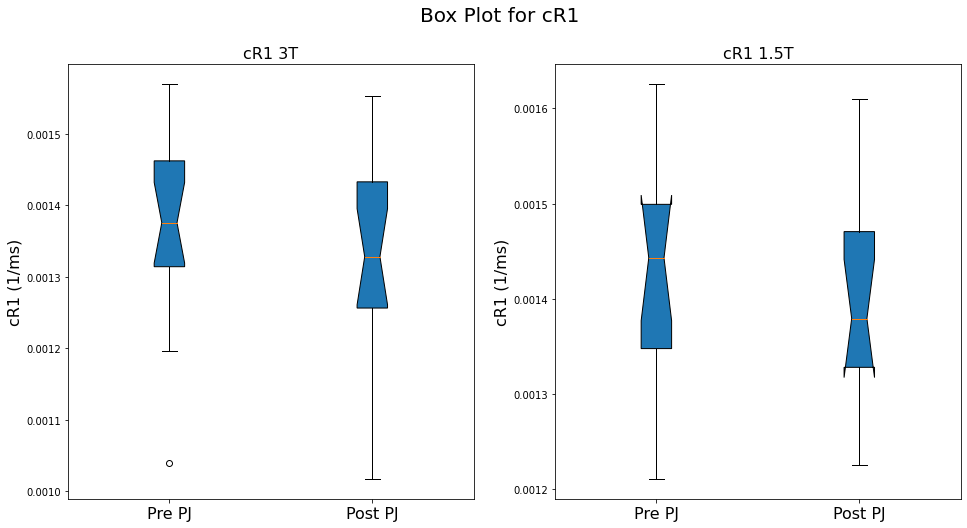

In [111]:
# Get the cR1 Box plot
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (16, 8))
fig.suptitle('Box Plot for cR1', fontsize = 20)

axes[0].boxplot([PA['cR1 median (Pre PJ)'], PA['cR1 median (Post PJ)']], patch_artist = True, notch = True)
axes[0].set_title('cR1 3T', fontsize = 16)
axes[0].set_ylabel('cR1 (1/ms)', fontsize = 16)
axes[0].set_xticklabels(['Pre PJ', 'Post PJ'], fontsize = 16)

axes[1].boxplot([AV['cR1 median (Pre PJ)'], AV['cR1 median (Post PJ)']], patch_artist = True, notch = True)
axes[1].set_title('cR1 1.5T', fontsize = 16)
axes[1].set_ylabel('cR1 (1/ms)', fontsize = 16)
axes[1].set_xticklabels(['Pre PJ', 'Post PJ'], fontsize = 16)

print('There was a outlier in the cR1 metric for the 3T Prisma Pre PJ group. From visual point of view, the data for each group follows close to normal distribution.')

#TODO: change color for the plot


## Histogram

Text(0.5, 0, 'PDFF (%)')

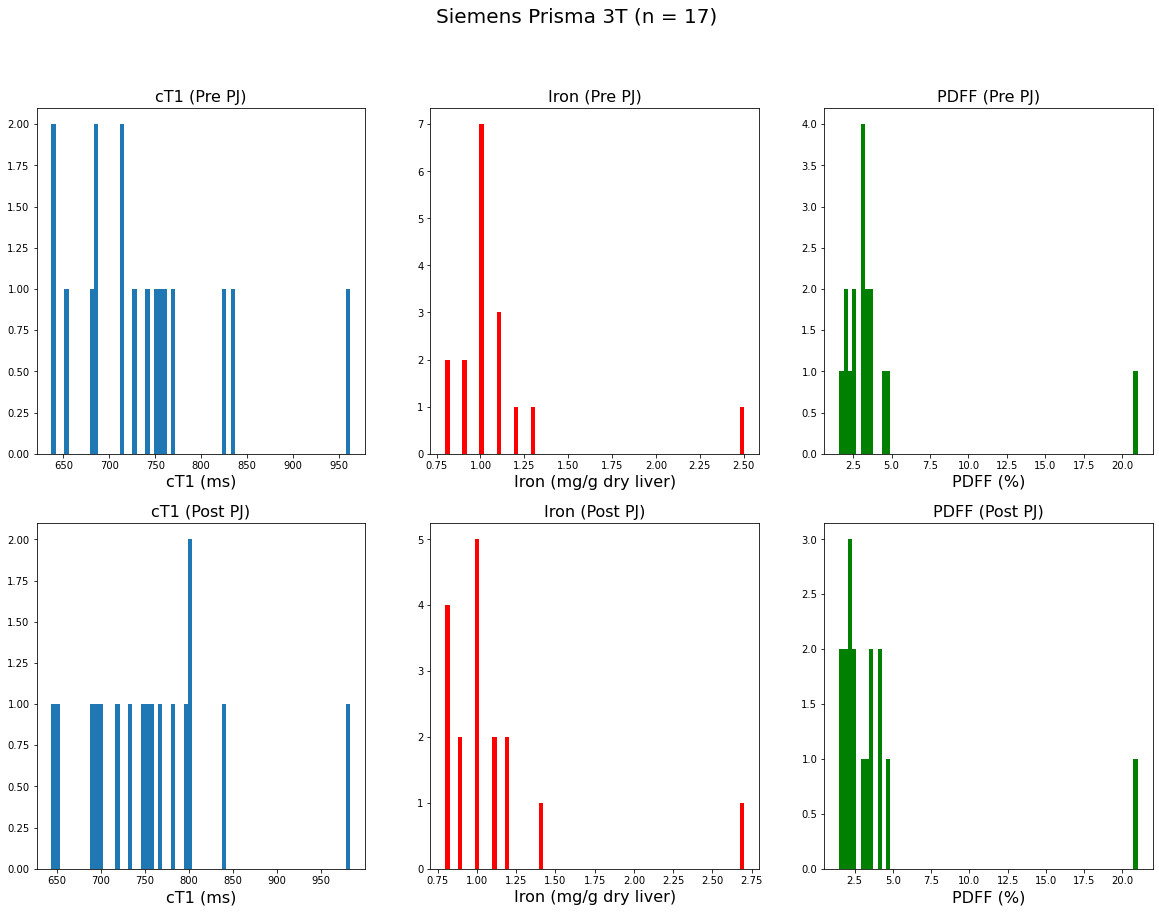

In [47]:
# TODO: make the ytick label in integer
# Histograms to explore data distribution for metric cT1, Iron, PDFF under 3T
fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (20,14))
fig.suptitle('Siemens Prisma 3T (n = 17)', fontsize = 20)

axes[0, 0].hist(PA["cT1 median (Pre PJ)"], bins = 70)
axes[0, 0].set_title("cT1 (Pre PJ)", fontsize = 16)
axes[0, 0].set_xlabel("cT1 (ms)", fontsize = 16)

axes[0, 1].hist(PA["Iron median (Pre PJ)"], bins = 70, color = 'red')
axes[0, 1].set_title("Iron (Pre PJ)", fontsize = 16)
axes[0, 1].set_xlabel("Iron (mg/g dry liver)", fontsize = 16)


axes[0, 2].hist(PA["PDFF median (Pre PJ)"], bins = 70, color = 'green')
axes[0, 2].set_title("PDFF (Pre PJ)", fontsize = 16)
axes[0, 2].set_xlabel("PDFF (%)", fontsize = 16)

axes[1, 0].hist(PA["cT1 median (Post PJ)"], bins = 70)
axes[1, 0].set_title("cT1 (Post PJ)", fontsize = 16)
axes[1, 0].set_xlabel("cT1 (ms)", fontsize = 16)

axes[1, 1].hist(PA["Iron median (Post PJ)"], bins = 70, color = 'red')
axes[1, 1].set_title("Iron (Post PJ)", fontsize = 16)
axes[1, 1].set_xlabel("Iron (mg/g dry liver)", fontsize = 16)


axes[1, 2].hist(PA["PDFF median (Post PJ)"], bins = 70, color = 'green')
axes[1, 2].set_title("PDFF (Post PJ)", fontsize = 16)
axes[1, 2].set_xlabel("PDFF (%)", fontsize = 16)
#plt.savefig("PA Hist bin = 70.png")

Text(0.5, 0, 'PDFF (%)')

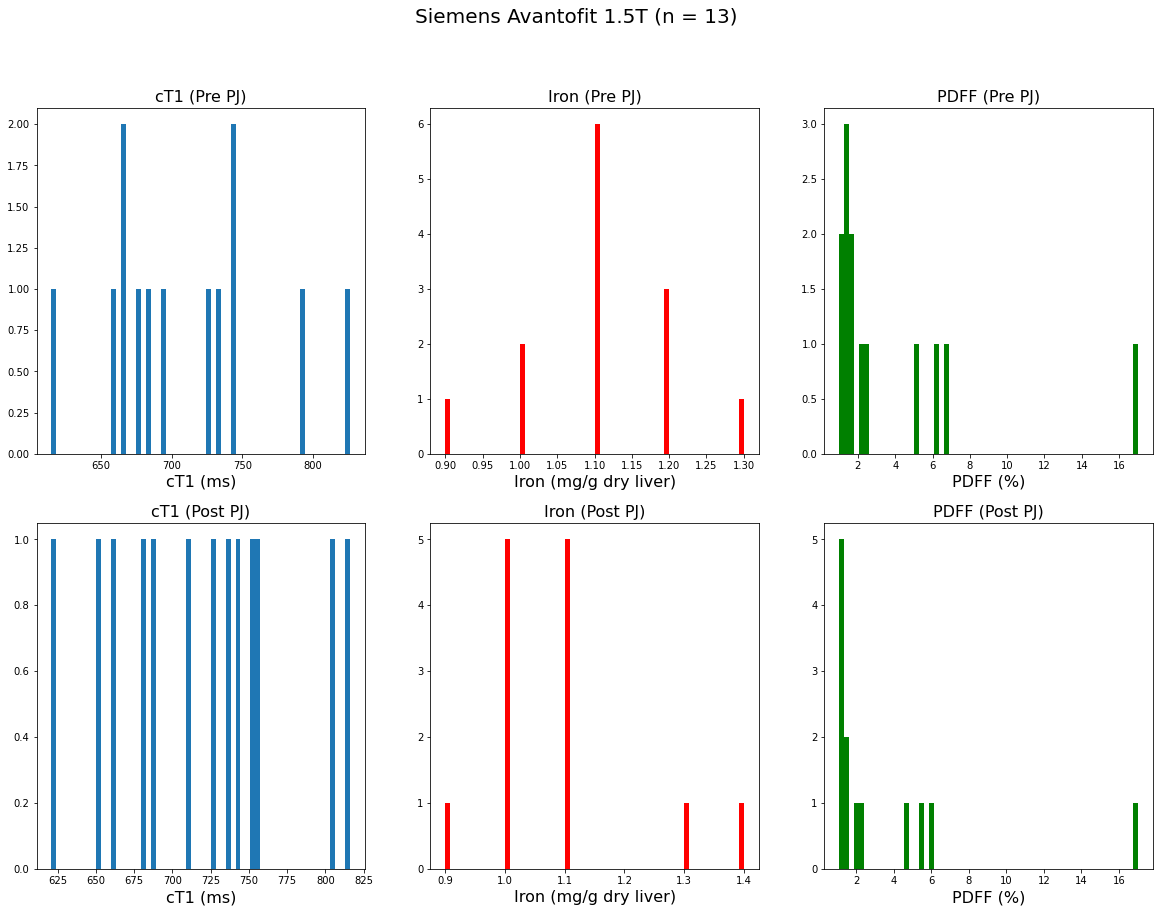

In [45]:
# TODO: make the ytick label in integer
# Histograms to explore data distribution for metric cT1, Iron, PDFF under 1.5T

fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (20,14))
fig.suptitle('Siemens Avantofit 1.5T (n = 13)', fontsize = 20)

axes[0, 0].hist(AV["cT1 median (Pre PJ)"], bins = 60)
axes[0, 0].set_title("cT1 (Pre PJ)", fontsize = 16)
axes[0, 0].set_xlabel("cT1 (ms)", fontsize = 16)

axes[0, 1].hist(AV["Iron median (Pre PJ)"], bins = 60, color = 'red')
axes[0, 1].set_title("Iron (Pre PJ)", fontsize = 16)
axes[0, 1].set_xlabel("Iron (mg/g dry liver)", fontsize = 16)

axes[0, 2].hist(AV["PDFF median (Pre PJ)"], bins = 60, color = 'green')
axes[0, 2].set_title("PDFF (Pre PJ)", fontsize = 16)
axes[0, 2].set_xlabel("PDFF (%)", fontsize = 16)

axes[1, 0].hist(AV["cT1 median (Post PJ)"], bins = 60)
axes[1, 0].set_title("cT1 (Post PJ)", fontsize = 16)
axes[1, 0].set_xlabel("cT1 (ms)", fontsize = 16)

axes[1, 1].hist(AV["Iron median (Post PJ)"], bins = 60, color = 'red')
axes[1, 1].set_title("Iron (Post PJ)", fontsize = 16)
axes[1, 1].set_xlabel("Iron (mg/g dry liver)", fontsize = 16)


axes[1, 2].hist(AV["PDFF median (Post PJ)"], bins = 60, color = 'green')
axes[1, 2].set_title("PDFF (Post PJ)", fontsize = 16)
axes[1, 2].set_xlabel("PDFF (%)", fontsize = 16)
# #plt.savefig("AV Hist bin 60.png")

From observing histogram, it is hard to conclude that cR1 for each group were drawn from normal distribution.


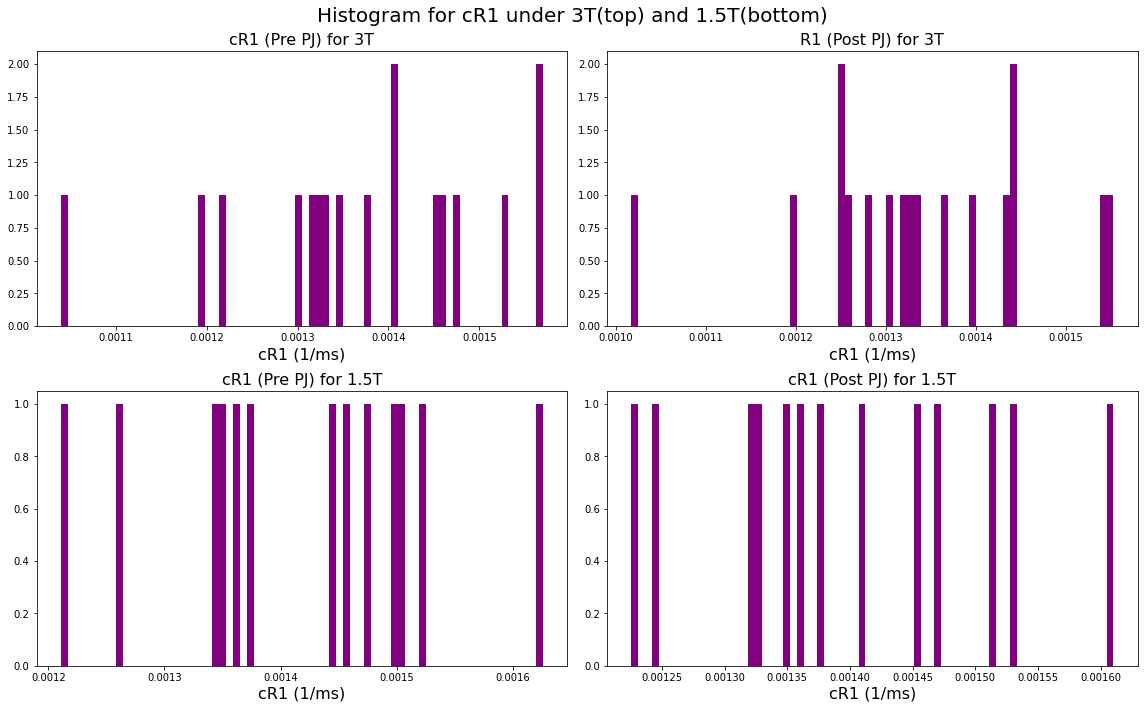

In [113]:
# TODO: make the ytick label in integer
# TODO: color the graphs
# Create histogram to explore data distribution for cR1 metric
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (16, 10))
fig.suptitle('Histogram for cR1 under 3T(top) and 1.5T(bottom)', fontsize = 20)

axes[0, 0].hist(PA['cR1 median (Pre PJ)'], color = 'purple', bins = 70)
axes[0, 0].set_title('cR1 (Pre PJ) for 3T', fontsize = 16)
axes[0, 0].set_xlabel('cR1 (1/ms)', fontsize = 16)

axes[0, 1].hist(PA['cR1 median (Post PJ)'], color = 'purple', bins = 70)
axes[0, 1].set_title('R1 (Post PJ) for 3T', fontsize = 16)
axes[0, 1].set_xlabel('cR1 (1/ms)', fontsize = 16)

axes[1, 0].hist(AV['cR1 median (Pre PJ)'], color = 'purple', bins = 70)
axes[1, 0].set_title('cR1 (Pre PJ) for 1.5T', fontsize = 16)
axes[1, 0].set_xlabel('cR1 (1/ms)', fontsize = 16)

axes[1, 1].hist(AV['cR1 median (Post PJ)'], color = 'purple', bins = 70)
axes[1, 1].set_title('cR1 (Post PJ) for 1.5T', fontsize = 16)
axes[1, 1].set_xlabel('cR1 (1/ms)', fontsize = 16)
plt.tight_layout()

print('From observing histogram, it is hard to conclude that cR1 for each group were drawn from normal distribution.')


# Visualise Trend

## Bar Plot

In [101]:
# TODO: ask Dan should we plot the population mean or population median for the next graph 

PA_cT1_dif  = PA["cT1 median (Post PJ)"] -  PA["cT1 median (Pre PJ)"]
PA_cR1_dif  = PA["cR1 median (Post PJ)"] -  PA["cR1 median (Pre PJ)"]
PA_Iron_dif = PA["Iron median (Post PJ)"] - PA["Iron median (Pre PJ)"]
PA_PDFF_dif = PA["PDFF median (Post PJ)"] - PA["PDFF median (Pre PJ)"]

PA["cT1 Dif"]  = PA_cT1_dif
PA["cR1 Dif"]  = PA_cR1_dif
PA["Iron Dif"] = PA_Iron_dif
PA["PDFF Dif"] = PA_PDFF_dif

PA['median_cT1Diff']  = PA_cT1_dif.median()
PA['median_cR1Diff']  = PA_cR1_dif.median()
PA['median_IronDiff'] = PA_Iron_dif.median()
PA['median_PDFFDiff'] = PA_PDFF_dif.median()

PA['mean_cT1Diff']  = PA_cT1_dif.mean()
PA['mean_cR1Diff']  = PA_cR1_dif.mean()
PA['mean_IronDiff'] = PA_Iron_dif.mean()
PA['mean_PDFFDiff'] = PA_PDFF_dif.mean()

print(PA['median_cT1Diff'].unique(),   PA['mean_cT1Diff'].unique())
print(PA['median_cR1Diff'].unique(),   PA['mean_cR1Diff'].unique())
print(PA['median_IronDiff'].unique(),  PA['mean_IronDiff'].unique())
print(PA['median_PDFFDiff'].unique(),  PA['mean_PDFFDiff'].unique())

[21.] [19.29411765]
[-2.90266634e-05] [-3.60887008e-05]
[0.] [0.]
[-0.2] [-0.22352941]


/var/folders/lp/b_vqnmbx63n92ngpptk0k4480000gp/T/ipykernel_41694/1126033726.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(PA["Record Id"], rotation = 50, ha = 'right')
/var/folders/lp/b_vqnmbx63n92ngpptk0k4480000gp/T/ipykernel_41694/1126033726.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(PA["Record Id"], rotation = 50, ha = 'right')
/var/folders/lp/b_vqnmbx63n92ngpptk0k4480000gp/T/ipykernel_41694/1126033726.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_xticklabels(PA["Record Id"], rotation = 50, ha = 'right')
/var/folders/lp/b_vqnmbx63n92ngpptk0k4480000gp/T/ipykernel_41694/1126033726.py:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax4.set_xticklabels(PA["Record Id"], rotation = 50, ha = 'right')


The difference between the population median and population mean for each metric delta value is smaller than that for 1.5T. Interestingly, the delta of cT1 and delta of cR1 were in opposite side of the horizontal axis.


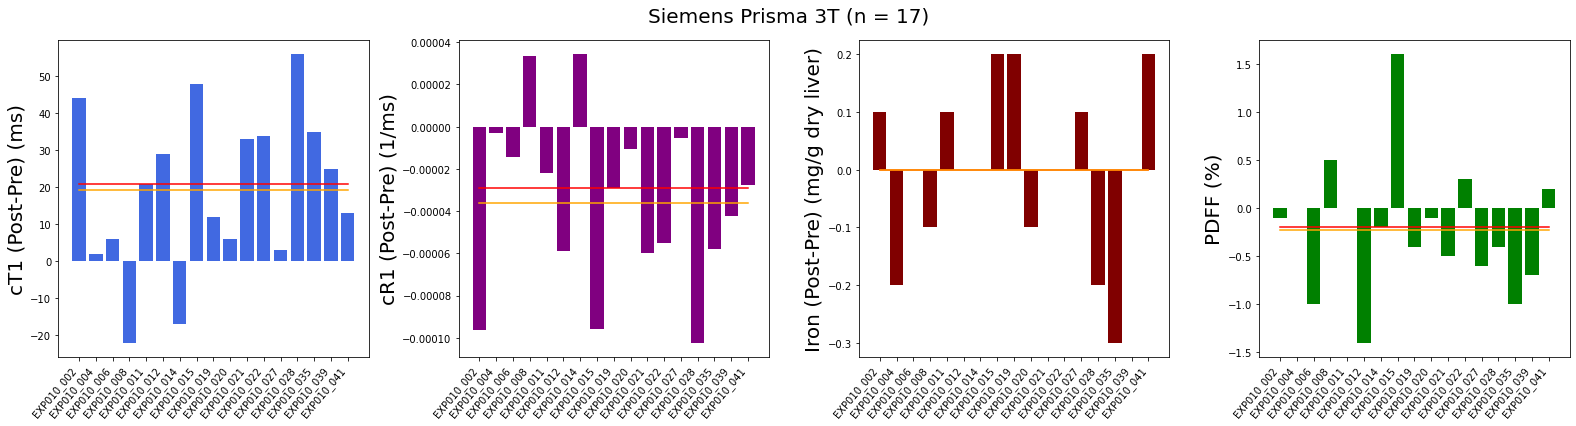

In [106]:
# TODO: annotae with legend for red and orange lines
fig = plt.figure(figsize = (22,6))
fig.suptitle('Siemens Prisma 3T (n = 17)', fontsize = 20)

ax1 = fig.add_subplot(141)
plt.bar(PA["Record Id"], PA["cT1 Dif"], color = "royalblue")
plt.plot(PA["Record Id"], PA["median_cT1Diff"], color = 'red')
plt.plot(PA["Record Id"], PA["mean_cT1Diff"], color = 'orange')
ax1.set_ylabel("cT1 (Post-Pre) (ms)", fontsize = 20)
ax1.set_xticklabels(PA["Record Id"], rotation = 50, ha = 'right')

ax2 = fig.add_subplot(142)
plt.bar(PA["Record Id"], PA["cR1 Dif"], color = "purple")
plt.plot(PA["Record Id"], PA["median_cR1Diff"], color = 'red')
plt.plot(PA["Record Id"], PA["mean_cR1Diff"], color = 'orange')
ax2.set_ylabel("cR1 (Post-Pre) (1/ms)", fontsize = 20)
ax2.set_xticklabels(PA["Record Id"], rotation = 50, ha = 'right')

ax3 = fig.add_subplot(143)
plt.bar(PA["Record Id"], PA["Iron Dif"], color = "maroon")
plt.plot(PA["Record Id"], PA["median_IronDiff"], color = 'red')
plt.plot(PA["Record Id"], PA["mean_IronDiff"], color = 'orange')
ax3.set_ylabel("Iron (Post-Pre) (mg/g dry liver)", fontsize = 20)
ax3.set_xticklabels(PA["Record Id"], rotation = 50, ha = 'right')

ax4 = fig.add_subplot(144)
plt.bar(PA["Record Id"], PA["PDFF Dif"], color = "green")
plt.plot(PA["Record Id"], PA["median_PDFFDiff"], color = 'red')
plt.plot(PA["Record Id"], PA["mean_PDFFDiff"], color = 'orange')
ax4.set_ylabel("PDFF (%)", fontsize = 20)
ax4.set_xticklabels(PA["Record Id"], rotation = 50, ha = 'right')

plt.tight_layout()
#plt.savefig("PA Bar Delta.png")

print('The difference between the population median and population mean for each metric delta value is smaller than that for 1.5T. Interestingly, the delta of cT1 and delta of cR1 were in opposite side of the horizontal axis.')

In [107]:
AV['cT1_dif']  = AV["cT1 median (Post PJ)"] -  AV["cT1 median (Pre PJ)"]
AV['cR1_dif']  = AV["cR1 median (Post PJ)"] -  AV["cR1 median (Pre PJ)"]
AV['Iron_dif'] = AV["Iron median (Post PJ)"] - AV["Iron median (Pre PJ)"]
AV['PDFF_dif'] = AV["PDFF median (Post PJ)"] - AV["PDFF median (Pre PJ)"]

AV['median_cT1Diff']  = AV['cT1_dif'].median()
AV['median_cR1Diff']  = AV['cR1_dif'].median()
AV['median_IronDiff'] = AV['Iron_dif'].median()
AV['median_PDFFDiff'] = AV['PDFF_dif'].median()

AV['mean_cT1Diff']  = AV['cT1_dif'].mean()
AV['mean_cR1Diff']  = AV['cR1_dif'].mean()
AV['mean_IronDiff'] = AV['Iron_dif'].mean()
AV['mean_PDFFDiff'] = AV['PDFF_dif'].mean()

print(AV['median_cT1Diff'].unique(), AV['mean_cT1Diff'].unique())
print(AV['median_cR1Diff'].unique(), AV['mean_cR1Diff'].unique())
print(AV['median_IronDiff'].unique(), AV['mean_IronDiff'].unique())
print(AV['median_PDFFDiff'].unique(), AV['mean_PDFFDiff'].unique())



[12.] [9.38461538]
[-1.88451681e-05] [-1.8638846e-05]
[0.] [-0.02307692]
[-0.1] [-0.15384615]


/var/folders/lp/b_vqnmbx63n92ngpptk0k4480000gp/T/ipykernel_41694/943622958.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(AV["Record Id"], rotation = 50, ha = 'right')
/var/folders/lp/b_vqnmbx63n92ngpptk0k4480000gp/T/ipykernel_41694/943622958.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(AV["Record Id"], rotation = 50, ha = 'right')
/var/folders/lp/b_vqnmbx63n92ngpptk0k4480000gp/T/ipykernel_41694/943622958.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_xticklabels(AV["Record Id"], rotation = 50, ha = 'right')
/var/folders/lp/b_vqnmbx63n92ngpptk0k4480000gp/T/ipykernel_41694/943622958.py:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax4.set_xticklabels(AV["Record Id"], rotation = 50, ha = 'right')


Note that in iron metric (middle graph), there were a lot of quantified iron value effectively being zero and therefore, the difference/delta/change in iron were also zero for these case. The red lines indicate the population median for each metric while orange lines indicate the population mean for each metric


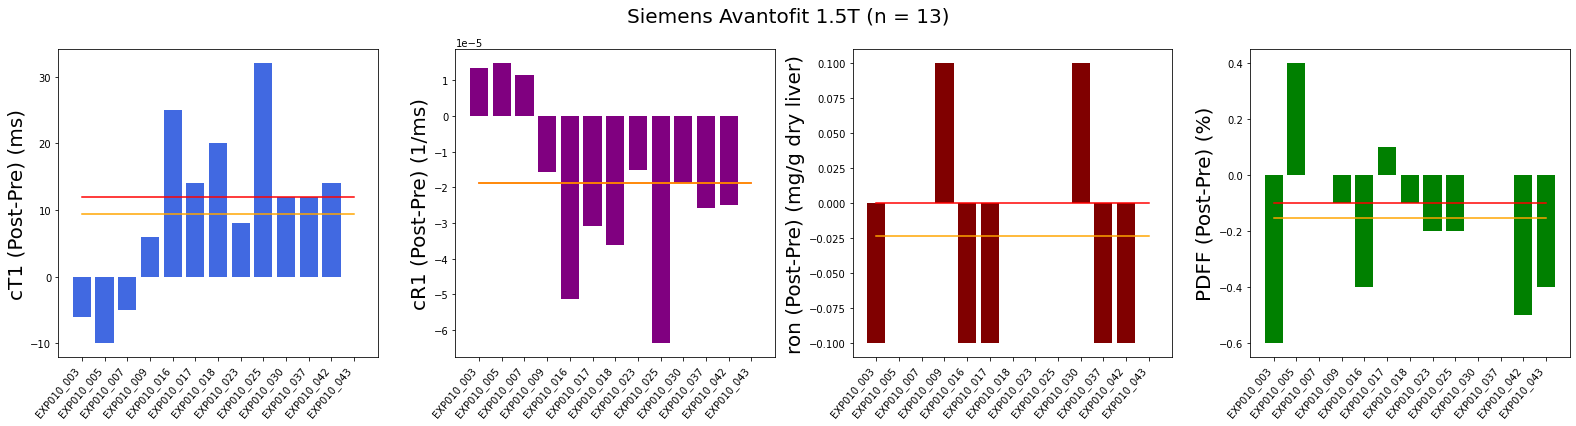

In [109]:
# TODO: annotate the legend median and mean for the red and orange lines
fig = plt.figure(figsize = (22,6))
fig.suptitle('Siemens Avantofit 1.5T (n = 13)', fontsize = 20)

ax1 = fig.add_subplot(141)
plt.bar(AV["Record Id"], AV["cT1_dif"], color = "royalblue")
plt.plot(AV["Record Id"], AV['median_cT1Diff'], color = 'red')
plt.plot(AV["Record Id"], AV['mean_cT1Diff'], color = 'orange')
ax1.set_ylabel("cT1 (Post-Pre) (ms)", fontsize = 20)
ax1.set_xticklabels(AV["Record Id"], rotation = 50, ha = 'right')

ax2 = fig.add_subplot(142)
plt.bar(AV["Record Id"], AV["cR1_dif"], color = "purple")
plt.plot(AV["Record Id"], AV['median_cR1Diff'], color = 'red')
plt.plot(AV["Record Id"], AV['mean_cR1Diff'], color = 'orange')
ax2.set_ylabel("cR1 (Post-Pre) (1/ms)", fontsize = 20)
ax2.set_xticklabels(AV["Record Id"], rotation = 50, ha = 'right')

ax3 = fig.add_subplot(143)
plt.bar(AV["Record Id"], AV["Iron_dif"], color = "maroon")
plt.plot(AV["Record Id"], AV['median_IronDiff'], color = 'red')
plt.plot(AV["Record Id"], AV['mean_IronDiff'], color = 'orange')
ax3.set_ylabel("ron (Post-Pre) (mg/g dry liver)", fontsize = 20)
ax3.set_xticklabels(AV["Record Id"], rotation = 50, ha = 'right')

ax4 = fig.add_subplot(144)
plt.bar(AV["Record Id"], AV["PDFF_dif"], color = "green")
plt.plot(AV["Record Id"], AV['median_PDFFDiff'], color = 'red')
plt.plot(AV["Record Id"], AV['mean_PDFFDiff'], color = 'orange')
ax4.set_ylabel("PDFF (Post-Pre) (%)", fontsize = 20)
ax4.set_xticklabels(AV["Record Id"], rotation = 50, ha = 'right')

plt.tight_layout()

print('Note that in iron metric (middle graph), there were a lot of quantified iron value effectively being zero and therefore, the difference/delta/change in iron were also zero for these case. The red lines indicate the population median for each metric while orange lines indicate the population mean for each metric')
#plt.savefig("AV Bar Delta.png")

## Scatter Line Plot

In [120]:
#define the plotting function
def PrePost(a, b):
    plt.scatter(np.zeros(data_length), a, color = "blue")
    plt.scatter(np.ones(data_length), b, color = "green")

    for i in range(data_length):
        plt.plot( [0,1], [a.iloc[i], b.iloc[i]], color = "k")
    
    plt.plot([0,1], [np.median(a), np.median(a)], color = "red", linewidth = 5.0)
    plt.plot([0,1], [np.mean(a), np.mean(a)], color = "orange", linewidth = 5.0)

The red lines connect the population median pre PJ to population median pre PJ for each metric, while the orange lines connect the population mean pre PJ to population mean post PJ for each metric.


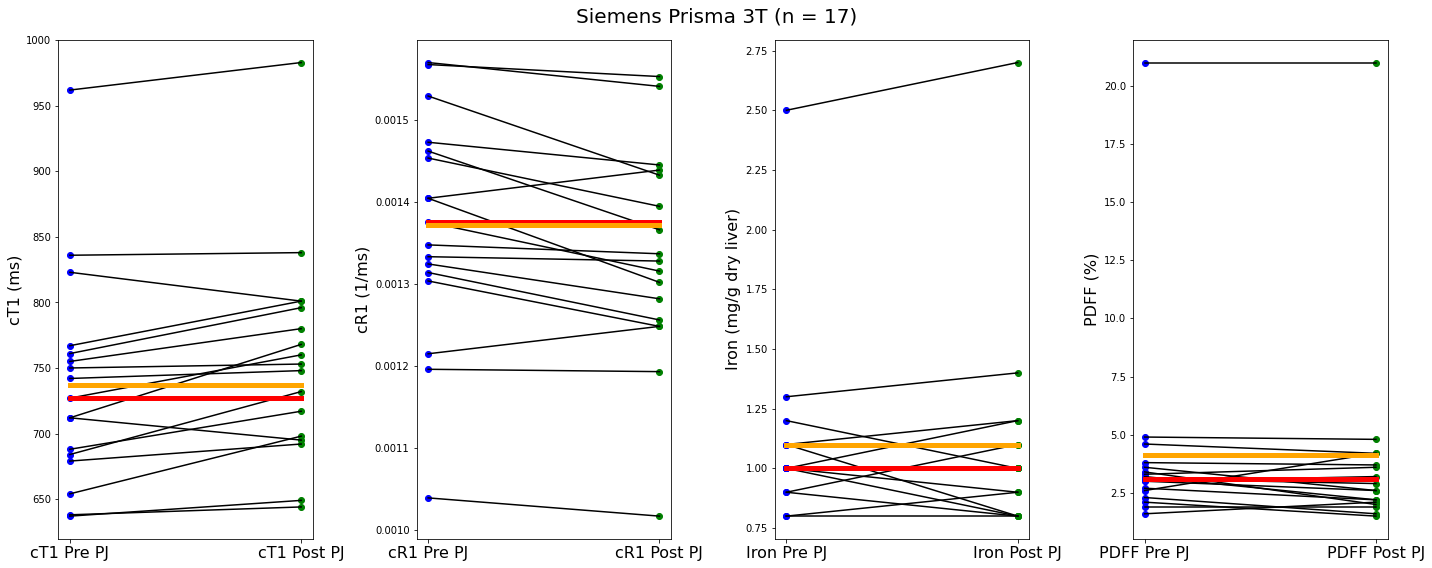

In [123]:
# # Scatter Line trend plot for 3T
fig = plt.figure(figsize = (20,8))
fig.suptitle("Siemens Prisma 3T (n = 17)", fontsize = 20)

data_length = len(PA["cT1 median (Pre PJ)"])

fig.add_subplot(141)
PrePost(PA["cT1 median (Pre PJ)"], PA["cT1 median (Post PJ)"])
plt.xticks([0,1], ["cT1 Pre PJ", "cT1 Post PJ"], fontsize = 16) 
plt.ylabel("cT1 (ms)", fontsize = 16)

fig.add_subplot(142)
PrePost(PA["cR1 median (Pre PJ)"], PA["cR1 median (Post PJ)"])
plt.xticks([0,1], ["cR1 Pre PJ", "cR1 Post PJ"], fontsize = 16) 
plt.ylabel("cR1 (1/ms)", fontsize = 16)

fig.add_subplot(143)
PrePost(PA["Iron median (Pre PJ)"], PA["Iron median (Post PJ)"])
plt.xticks([0,1], ["Iron Pre PJ", "Iron Post PJ"], fontsize = 16)
plt.ylabel("Iron (mg/g dry liver)", fontsize = 16)

fig.add_subplot(144)
PrePost(PA["PDFF median (Pre PJ)"], PA["PDFF median (Post PJ)"])
plt.xticks([0,1], ["PDFF Pre PJ", "PDFF Post PJ"], fontsize = 16)
plt.ylabel("PDFF (%)", fontsize = 16)

plt.tight_layout()
#plt.savefig("PA Trend.png")

print('The red lines connect the population median pre PJ to population median pre PJ for each metric, while the orange lines connect the population mean pre PJ to population mean post PJ for each metric.')


The red lines connect the population median pre PJ to population median pre PJ for each metric, while the orange lines connect the population mean pre PJ to population mean post PJ for each metric.


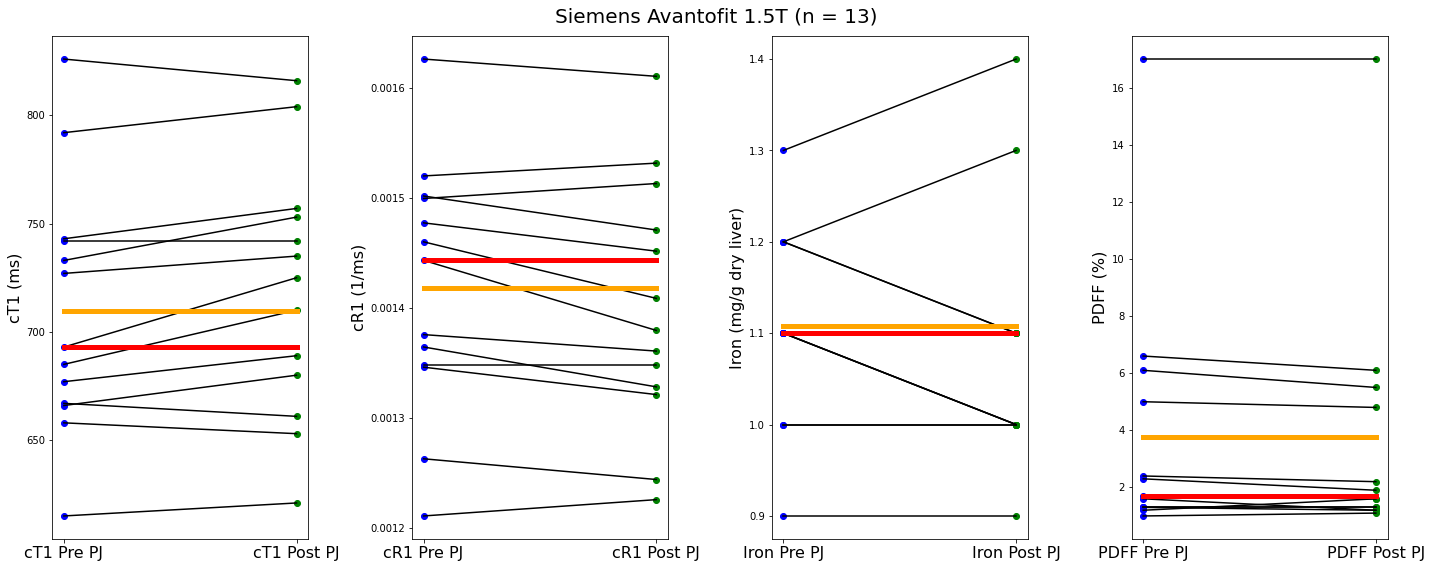

In [124]:
# Scatter Line trend plot for 1.5T
fig = plt.figure(figsize = (20,8))
fig.suptitle("Siemens Avantofit 1.5T (n = 13)", fontsize = 20)

data_length = len(AV["cT1 median (Pre PJ)"])

fig.add_subplot(141)
PrePost(AV["cT1 median (Pre PJ)"], AV["cT1 median (Post PJ)"])
plt.xticks([0,1], ["cT1 Pre PJ", "cT1 Post PJ"], fontsize = 16) 
plt.ylabel("cT1 (ms)", fontsize = 16)

fig.add_subplot(142)
PrePost(AV["cR1 median (Pre PJ)"], AV["cR1 median (Post PJ)"])
plt.xticks([0,1], ["cR1 Pre PJ", "cR1 Post PJ"], fontsize = 16) 
plt.ylabel("cR1 (1/ms)", fontsize = 16)

fig.add_subplot(143)
PrePost(AV["Iron median (Pre PJ)"], AV["Iron median (Post PJ)"])
plt.xticks([0,1], ["Iron Pre PJ", "Iron Post PJ"], fontsize = 16)
plt.ylabel("Iron (mg/g dry liver)", fontsize = 16)

fig.add_subplot(144)
PrePost(AV["PDFF median (Pre PJ)"], AV["PDFF median (Post PJ)"])
plt.xticks([0,1], ["PDFF Pre PJ", "PDFF Post PJ"], fontsize = 16)
plt.ylabel("PDFF (%)", fontsize = 16)

plt.tight_layout()

print('The red lines connect the population median pre PJ to population median pre PJ for each metric, while the orange lines connect the population mean pre PJ to population mean post PJ for each metric.')
#plt.savefig("AV Trend.png")

# Bland Altman Analysis

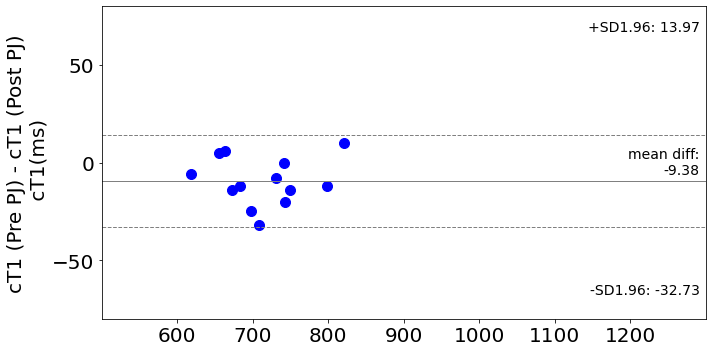

In [101]:
# Plot Bland Altman plots 
# https://stackoverflow.com/questions/16399279/bland-altman-plot-in-python

f, ax = plt.subplots(figsize = (10, 5))
sm.graphics.mean_diff_plot(AV["cT1 median (Pre PJ)"], AV["cT1 median (Post PJ)"],  ax = ax, scatter_kwds = {"color":"blue", 's':100})
ax.set_xlim(500,1300)
ax.set_ylim(-80,80)
ax.set_xticks([600, 700, 800, 900, 1000, 1100, 1200])
ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)
ax.set_yticks([-50, 0, 50])
ax.set_ylabel("cT1 (Pre PJ) - cT1 (Post PJ)\n cT1(ms)", fontsize = 20)
# ax.set_title("Siemens Avantofit 1.5T", fontsize = 20)
ax.set_xlabel('')
plt.tight_layout()
plt.savefig("AV cT1 Bland Altman Nov 10.png")

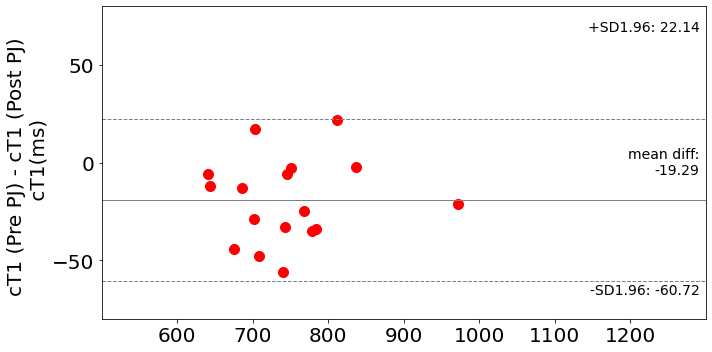

In [100]:
f, ax = plt.subplots(figsize = (10, 5))
sm.graphics.mean_diff_plot(PA["cT1 median (Pre PJ)"], PA["cT1 median (Post PJ)"],  ax = ax, scatter_kwds = {"color":"red", 's':100})
ax.set_ylabel("cT1 (Pre PJ) - cT1 (Post PJ) \n cT1(ms)", fontsize = 20)
# ax.set_title("Siemens Prisma 3T", fontsize = 16)
ax.set_xlim(500,1300)
ax.set_ylim(-80,80)
ax.set_xticks([600, 700, 800, 900, 1000, 1100, 1200])
ax.set_yticks([-50, 0, 50])
ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)
ax.set_xlabel('')
plt.tight_layout()
plt.savefig("PA cT1 Bland Altman Nov 10.png")

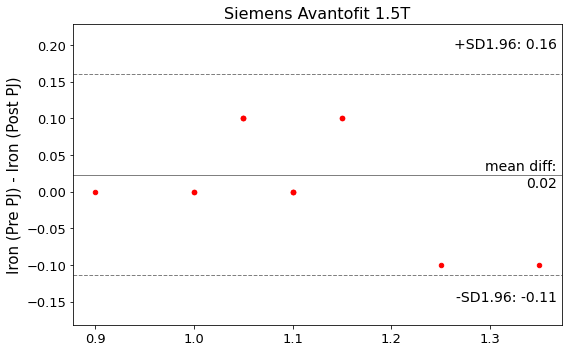

In [162]:
f, ax = plt.subplots(figsize = (8, 5))
sm.graphics.mean_diff_plot(AV["Iron median (Pre PJ)"], AV["Iron median (Post PJ)"],  ax = ax, scatter_kwds = {"color":"red"})
ax.set_ylabel("Iron (Pre PJ) - Iron (Post PJ)")
ax.set_title("Siemens Avantofit 1.5T", fontsize = 16)
ax.set_xlabel('')
plt.tight_layout()
plt.savefig("AV Iron Bland Altman.png")

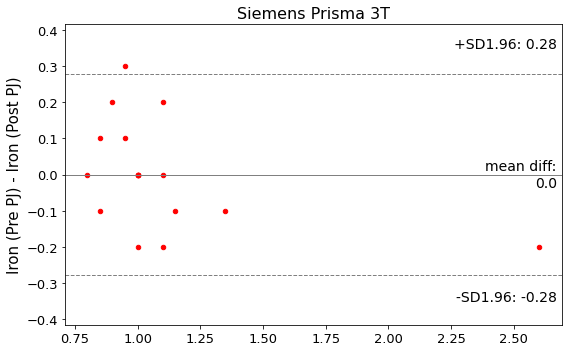

In [163]:
f, ax = plt.subplots(figsize = (8, 5))
sm.graphics.mean_diff_plot(PA["Iron median (Pre PJ)"], PA["Iron median (Post PJ)"],  ax = ax, scatter_kwds = {"color":"red"})
ax.set_ylabel("Iron (Pre PJ) - Iron (Post PJ)")
ax.set_title("Siemens Prisma 3T", fontsize = 16)
ax.set_xlabel('')
plt.tight_layout()
plt.savefig("PA Iron Bland Altman.png")

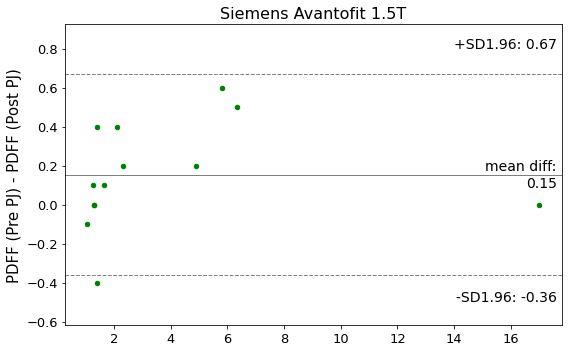

In [164]:
f, ax = plt.subplots(figsize = (8, 5))
sm.graphics.mean_diff_plot(AV["PDFF median (Pre PJ)"], AV["PDFF median (Post PJ)"],  ax = ax, scatter_kwds = {"color":"green"})
ax.set_ylabel("PDFF (Pre PJ) - PDFF (Post PJ)")
ax.set_title("Siemens Avantofit 1.5T", fontsize = 16)
ax.set_xlabel('')
plt.tight_layout()
plt.savefig("AV PDFF Bland Altman.png")

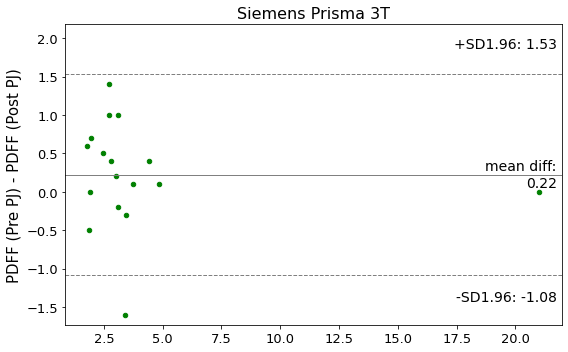

In [165]:
f, ax = plt.subplots(figsize = (8, 5))
sm.graphics.mean_diff_plot(PA["PDFF median (Pre PJ)"], PA["PDFF median (Post PJ)"],  ax = ax, scatter_kwds = {"color":"green"})
ax.set_ylabel("PDFF (Pre PJ) - PDFF (Post PJ)")
ax.set_title("Siemens Prisma 3T", fontsize = 16)
ax.set_xlabel('')
plt.tight_layout()
plt.savefig("PA PDFF Bland Altman.png")

# Shapiro Wilk Test for Normality

In [30]:
# Use Shapio- Wilk test to test Normality
# If W is less than one, the dataset is away from being drawn from normal distribution.
# The p value of Shapiro Wilk Test is to test the hyposthesis of the Shapio-Wilk test to reject the null Ho
# Shapiro Wilk test is quite sensitive, sometimes if the data from histigram seems normallt distributed, it can still be test with parametric t test.
# https://www.youtube.com/watch?v=dRAqSsgkCUc&ab_channel=MatthewE.Clapham


a = stats.shapiro(AV["cT1 median (Pre PJ)"])
b = stats.shapiro(AV["Iron median (Pre PJ)"])
c = stats.shapiro(AV["PDFF median (Pre PJ)"])
d = stats.shapiro(AV["cT1 median (Post PJ)"])
e = stats.shapiro(AV["Iron median (Post PJ)"])
f = stats.shapiro(AV["PDFF median (Post PJ)"])

data = {"Biomarkers" : ["cT1 Pre PJ", "Iron (Pre PJ)", "PDFF (Pe PJ)", "cT1 (Post PJ)", "Iron (Post PF)", "PDFF (Post PJ)"], "Shapiro Wilk Test Result (W, p value)": [a, b, c, d, e, f], "Normal Distribution?": ["Yes", "Yes", "No", "Yes", "No", "No"]}
SP = pd.DataFrame(data = data)
SP.style.set_caption("Siemens Avantofit 1.5T")
# dfi.export(SP, "AV Shapiro Wilk Test for Normality Nov 10.png")

,Biomarkers,"Shapiro Wilk Test Result (W, p value)",Normal Distribution?
0,cT1 Pre PJ,"ShapiroResult(statistic=0.9594494104385376, pvalue=0.7451412081718445)",Yes
1,Iron (Pre PJ),"ShapiroResult(statistic=0.926966667175293, pvalue=0.31089308857917786)",Yes
2,PDFF (Pe PJ),"ShapiroResult(statistic=0.6438919305801392, pvalue=0.0001609734899830073)",No
3,cT1 (Post PJ),"ShapiroResult(statistic=0.9780265688896179, pvalue=0.9685270190238953)",Yes
4,Iron (Post PF),"ShapiroResult(statistic=0.8337916135787964, pvalue=0.01767866685986519)",No
5,PDFF (Post PJ),"ShapiroResult(statistic=0.6100608110427856, pvalue=8.008096483536065e-05)",No


In [31]:

a = stats.shapiro(PA["cT1 median (Pre PJ)"])
b = stats.shapiro(PA["Iron median (Pre PJ)"])
c = stats.shapiro(PA["PDFF median (Pre PJ)"])
d = stats.shapiro(PA["cT1 median (Post PJ)"])
e = stats.shapiro(PA["Iron median (Post PJ)"])
f = stats.shapiro(PA["PDFF median (Post PJ)"])

data = {"Biomarkers" : ["cT1 Pre PJ", "Iron (Pre PJ)", "PDFF (Pe PJ)", "cT1 (Post PJ)", "Iron (Post PF)", "PDFF (Post PJ)"], "Shapiro Wilk Test Result (W, p value)": [a, b, c, d, e, f], "Normal Distribution?": ["Yes", "No", "No", "Yes", "No", "No"]}
SP = pd.DataFrame(data = data)
SP.style.set_caption("Siemens Prisma 3T")
# dfi.export(SP, "PA Shapiro Wilk Test for Normality Nov 10.png")

,Biomarkers,"Shapiro Wilk Test Result (W, p value)",Normal Distribution?
0,cT1 Pre PJ,"ShapiroResult(statistic=0.900958240032196, pvalue=0.07047820091247559)",Yes
1,Iron (Pre PJ),"ShapiroResult(statistic=0.5656453371047974, pvalue=4.929992883262457e-06)",No
2,PDFF (Pe PJ),"ShapiroResult(statistic=0.4432595372200012, pvalue=4.433605909071048e-07)",No
3,cT1 (Post PJ),"ShapiroResult(statistic=0.9062672257423401, pvalue=0.08653995394706726)",Yes
4,Iron (Post PF),"ShapiroResult(statistic=0.5974621772766113, pvalue=9.838609912549146e-06)",No
5,PDFF (Post PJ),"ShapiroResult(statistic=0.4593563675880432, pvalue=5.966778076071932e-07)",No


In [45]:
# Combining Shapiro Wilk Test for normality result

SW_AV_cT1_Pre = stats.shapiro(AV["cT1 median (Pre PJ)"])
SW_AV_cT1_Post = stats.shapiro(AV["cT1 median (Post PJ)"])
SW_AV_Iron_Pre = stats.shapiro(AV["Iron median (Pre PJ)"])
SW_AV_Iron_Post = stats.shapiro(AV["Iron median (Post PJ)"])
SW_AV_PDFF_Pre = stats.shapiro(AV["PDFF median (Pre PJ)"])
SW_AV_PDFF_Post = stats.shapiro(AV["PDFF median (Post PJ)"])
SW_PA_cT1_Pre = stats.shapiro(PA["cT1 median (Pre PJ)"])
SW_PA_cT1_Post = stats.shapiro(PA["cT1 median (Post PJ)"])
SW_PA_Iron_Pre = stats.shapiro(PA["Iron median (Pre PJ)"])
SW_PA_Iron_Post = stats.shapiro(PA["Iron median (Post PJ)"])
SW_PA_PDFF_Pre = stats.shapiro(PA["PDFF median (Pre PJ)"])
SW_PA_PDFF_Post = stats.shapiro(PA["PDFF median (Post PJ)"])

data = {
"Field Strength": ['1.5T','1.5T','1.5T','1.5T','1.5T','1.5T', '3T','3T','3T','3T','3T','3T'],
"Biomarkers" : ['cT1 (Pre PJ)', 'cT1 (Post PJ)', 'Iron (Pre PJ)', 'Iron (Post PF)', 'PDFF (Pre PJ)', 'PDFF (Post PJ)', 'cT1 (Pre PJ)', 'cT1 (Post PJ)', 'Iron (Pre PJ)', 'Iron (Post PF)', 'PDFF (Pre PJ)', 'PDFF (Post PJ)'], 
"Shapiro Wilk Test Result (statistic, p value)": [SW_AV_cT1_Pre, SW_AV_cT1_Post, SW_AV_Iron_Pre, SW_AV_Iron_Post, SW_AV_PDFF_Pre, SW_AV_PDFF_Post, SW_PA_cT1_Pre, SW_PA_cT1_Post, SW_PA_Iron_Pre, SW_PA_Iron_Post, SW_PA_PDFF_Pre, SW_PA_PDFF_Post],
"Normal Distribution?": ["Yes", "Yes", "Yes", "No", "No", "No", "Yes", "Yes", "No", "No", "No", "No"]
}

SWS = pd.DataFrame(data = data) # Shapiro Wilk Test Summary
dfi.export(SWS, "Shapiro Wilk Test for Normality Summary Nov 10.png")

print('This suggest that the cT1 is normally distributed and is fit for paired 2-sided T-test. But Iron and PDFF data sets do not normal distribution, and therefore to compare the differences pre and post pineapple juice, a wilcoxon test should be performed.')

# Paire T test and Wilcoxon Rank Test

In [34]:
# T Test for 1.5T
# Strictly speaking because the cT1 datasets failed Shapiro Wilk test, it is not normallyu distributed however, given the fact that the histogram shows a distributioin similar to normal distribution, we use paired student t test to see if cT1 Pre and Post difference is significant
# Regarding whether or not using one tailed or 2-tailed, this has to be driven by expectation.  Not by looking at the data!
# https://www.youtube.com/watch?v=AZHh5iGdJUw&list=PLfhL43gLKJ5lBXJw5THlC2V0BZ1FuItuv&index=5&ab_channel=MatthewE.Clapham

cT1TT = stats.ttest_rel(AV["cT1 median (Pre PJ)"], AV["cT1 median (Post PJ)"])
IronTT = stats.ttest_rel(AV["Iron median (Pre PJ)"], AV["Iron median (Post PJ)"])
PDFFTT = stats.ttest_rel(AV["PDFF median (Pre PJ)"], AV["PDFF median (Post PJ)"])
Tcritical = '±2.001717'
data2 = {"Biomarkers":["cT1", "Iron", "PDFF"], "Paired T Test (T, p value) Avantofit 1.5T":[cT1TT, IronTT, PDFFTT], "T critical": [Tcritical, Tcritical, Tcritical], "Difference is significant?": ['Yes', '', '']}
AV_TT = pd.DataFrame(data = data2)
AV_TT

,Biomarkers,"Paired T Test (T, p value) Avantofit 1.5T",T critical,Difference is significant?
0,cT1,"(-2.7287989483455823, 0.01830715858404923)",±2.001717,Yes
1,Iron,"(1.1476380835140092, 0.27348356292027853)",±2.001717,
2,PDFF,"(2.0341905108624307, 0.06464944623809715)",±2.001717,


In [35]:
# T Test for 3T

cT1TT = stats.ttest_rel(PA["cT1 median (Pre PJ)"], PA["cT1 median (Post PJ)"])
IronTT = stats.ttest_rel(PA["Iron median (Pre PJ)"], PA["Iron median (Post PJ)"])
PDFFTT = stats.ttest_rel(PA["PDFF median (Pre PJ)"], PA["PDFF median (Post PJ)"])
Tcritical = '±2.001717'
data2 = {"Biomarkers":["cT1", "Iron", "PDFF"], "Paired T Test (T, p value) Prisma 3T":[cT1TT, IronTT, PDFFTT], "T critical": [Tcritical, Tcritical, Tcritical], "Difference is significant?": ['Yes', '', '']}
PA_TT = pd.DataFrame(data = data2)
PA_TT

,Biomarkers,"Paired T Test (T, p value) Prisma 3T",T critical,Difference is significant?
0,cT1,"(-3.6511556668119423, 0.002153453566093387)",±2.001717,Yes
1,Iron,"(0.0, 1.0)",±2.001717,
2,PDFF,"(1.3433979353901426, 0.19788798520285225)",±2.001717,


In [32]:
# Wilcoxon Test for 1.5T
cT1WT = stats.wilcoxon(AV["cT1 median (Pre PJ)"], AV["cT1 median (Post PJ)"])
IronWT = stats.wilcoxon(AV["Iron median (Pre PJ)"], AV["Iron median (Post PJ)"])
PDFFWT = stats.wilcoxon(AV["PDFF median (Pre PJ)"], AV["PDFF median (Post PJ)"])
data2 = {"Biomarkers":["cT1", "Iron", "PDFF"], "Wilcoxon signed-rank Test (W, p) Avantofit 1.5T":[cT1WT, IronWT, PDFFWT], "Difference is significant?": ['', 'No', 'No']}
AV_W = pd.DataFrame(data = data2)
AV_W

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/scipy/stats/morestats.py:2967: UserWarning: Exact p-value calculation does not work if there are ties. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/scipy/stats/morestats.py:2981: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


,Biomarkers,"Wilcoxon signed-rank Test (W, p) Avantofit 1.5T",Difference is significant?
0,cT1,"(8.5, 0.01660304168678943)",
1,Iron,"(7.5, 0.25963977138128647)",No
2,PDFF,"(10.0, 0.07408529075716488)",No


In [33]:
# Wilcoxon Test for 3T
cT1WT = stats.wilcoxon(PA["cT1 median (Pre PJ)"], PA["cT1 median (Post PJ)"])
IronWT = stats.wilcoxon(PA["Iron median (Pre PJ)"], PA["Iron median (Post PJ)"])
PDFFWT = stats.wilcoxon(PA["PDFF median (Pre PJ)"], PA["PDFF median (Post PJ)"])
Tcritical = '±2.001717'
data2 = {"Biomarkers":["cT1", "Iron", "PDFF"], "Wilcoxon signed-rank Test (W, p) Prisma 3T":[cT1WT, IronWT, PDFFWT], "Difference is significant?": ['', 'No', 'No']}
PA_W = pd.DataFrame(data = data2)
PA_W

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/scipy/stats/morestats.py:2967: UserWarning: Exact p-value calculation does not work if there are ties. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


,Biomarkers,"Wilcoxon signed-rank Test (W, p) Prisma 3T",Difference is significant?
0,cT1,"(16.0, 0.0025787353515625)",
1,Iron,"(33.0, 1.0)",No
2,PDFF,"(32.0, 0.11155200158294457)",No


In [46]:
# Combining T test (for cT1) and Wilcoxon test(for Iron and PDFF) results

cT1TT_AV = stats.ttest_rel(AV["cT1 median (Pre PJ)"], AV["cT1 median (Post PJ)"])
cT1TT_PA = stats.ttest_rel(PA["cT1 median (Pre PJ)"], PA["cT1 median (Post PJ)"])
IronWT_AV = stats.wilcoxon(AV["Iron median (Pre PJ)"], AV["Iron median (Post PJ)"])
IronWT_PA = stats.wilcoxon(PA["Iron median (Pre PJ)"], PA["Iron median (Post PJ)"])
PDFFWT_AV = stats.wilcoxon(AV["PDFF median (Pre PJ)"], AV["PDFF median (Post PJ)"])
PDFFWT_PA = stats.wilcoxon(PA["PDFF median (Pre PJ)"], PA["PDFF median (Post PJ)"])

tmp = {'Biomarkers':['cT1 1.5T', 'cT1 3T', 'Iron 1.5T', 'Iron 3T', 'PDFF 1.5T', 'PDFF 3T'],
       'Paired 2-sided Test':['T Test', 'T Test', 'Wilcoxon Test', 'Wilcoxon Test', 'Wilcoxon Test', 'Wilcoxon Test'],
       '(Test statistics, p-value)':[cT1TT_AV, cT1TT_PA, IronWT_AV, IronWT_PA, PDFFWT_AV, PDFFWT_PA],
       'Statistically Significant?':['Yes', 'Yes', 'No', 'No', 'No', 'No']
    }

TS = pd.DataFrame(data = tmp)   # TS: test summary
TS = TS.style.set_caption("Paired Test Summary")
dfi.export(TS, "Paired Test Summary Nov 10.png")

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/scipy/stats/morestats.py:2967: UserWarning: Exact p-value calculation does not work if there are ties. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/scipy/stats/morestats.py:2981: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


# Re-Analysis with R1

##### 3T

In [21]:
PA['cR1 median (Pre PJ)'] = 1/PA['cT1 median (Pre PJ)']
PA['cR1 median (Post PJ)'] = 1/PA['cT1 median (Post PJ)']
PA

,Record Id,Portal_ID (Pre PJ),EXP_number (Pre PJ),cT1 median (Pre PJ),Iron median (Pre PJ),PDFF median (Pre PJ),cT1 Q1 (Pre PJ),cT1 Q3 (Pre PJ),Iron Q1 (Pre PJ),Iron Q3 (Pre PJ),PDFF Q1 (Pre PJ),PDFF Q3 (Pre PJ),vendor_model (Pre PJ),field_strength (Pre PJ),Portal_ID (Post PJ),EXP_number (Post PJ),cT1 median (Post PJ),Iron median (Post PJ),PDFF median (Post PJ),cT1 Q1 (Post PJ),cT1 Q3 (Post PJ),Iron Q1 (Post PJ),Iron Q3 (Post PJ),PDFF Q1 (Post PJ),PDFF Q3 (Post PJ),cT1_Ref_Upper_y,cT1_Ref_Lower_y,Iron_Ref_y,PDFF_Ref_y,vendor_model (Post PJ),field_strength (Post PJ),cR1 median (Pre PJ),cR1 median (Post PJ),delta R1
0,EXP010_002,11947,EXP010vhobplp,654.0,1.1,4.9,626.0,695.0,1.1,1.2,3.9,5.9,SIEMENSPrisma,3T,9827,EXP010kfnnfem,698.0,1.2,4.8,668.0,735.0,1.1,1.2,3.8,5.9,633.0,794.0,1.8,5.6,SIEMENSPrisma,3T,0.001529,0.001433,0.000096
2,EXP010_004,9834,EXP010vkcrjqc,836.0,1.0,1.9,808.0,881.0,1.0,1.1,1.1,2.8,SIEMENSPrisma,3T,9830,EXP010ooxyfwn,838.0,0.8,1.9,810.0,881.0,0.8,0.8,1.1,2.7,633.0,794.0,1.8,5.6,SIEMENSPrisma,3T,0.001196,0.001193,0.000003
4,EXP010_006,9843,EXP010vuvdody,638.0,1.1,3.6,614.0,675.0,1.0,1.2,2.4,4.8,SIEMENSPrisma,3T,9840,EXP010ochlmjx,644.0,1.1,2.6,616.0,678.0,1.1,1.2,1.6,3.8,633.0,794.0,1.8,5.6,SIEMENSPrisma,3T,0.001567,0.001553,0.000015
6,EXP010_008,9618,EXP010wktzdls,823.0,0.9,1.6,780.0,861.0,0.9,1.0,0.9,2.4,SIEMENSPrisma,3T,9616,EXP010olbctkw,801.0,0.8,2.1,764.0,842.0,0.8,0.9,1.3,3.1,633.0,794.0,1.8,5.6,SIEMENSPrisma,3T,0.001215,0.001248,-0.000033
8,EXP010_011,9962,EXP010wlnocav,962.0,1.3,21.0,883.0,103.0,1.3,1.4,20.0,-23.0,SIEMENSPrisma,3T,9958,EXP010oyklrkq,983.0,1.4,21.0,917.0,104.0,1.3,1.4,19.0,-22.0,633.0,794.0,1.8,5.6,SIEMENSPrisma,3T,0.001040,0.001017,0.000022
9,EXP010_012,9973,EXP010wrtonqh,688.0,1.0,3.4,664.0,722.0,1.0,1.0,1.5,5.3,SIEMENSPrisma,3T,9971,EXP010pzugyag,717.0,1.0,2.0,692.0,749.0,1.0,1.0,0.9,3.3,633.0,794.0,1.8,5.6,SIEMENSPrisma,3T,0.001453,0.001395,0.000059
11,EXP010_014,9964,EXP010xresjqh,712.0,1.0,3.1,683.0,753.0,0.9,1.2,1.9,4.5,SIEMENSPrisma,3T,9959,EXP010pbukhnp,695.0,1.0,2.9,668.0,732.0,1.0,1.1,1.9,4.2,633.0,794.0,1.8,5.6,SIEMENSPrisma,3T,0.001404,0.001439,-0.000034
12,EXP010_015,9965,EXP010xukgukr,684.0,1.0,2.6,660.0,719.0,1.0,1.1,1.5,3.8,SIEMENSPrisma,3T,9960,EXP010pgarsgq,732.0,1.2,4.2,700.0,770.0,1.0,1.3,2.6,5.7,633.0,794.0,1.8,5.6,SIEMENSPrisma,3T,0.001462,0.001366,0.000096
16,EXP010_019,10166,EXP010xsnkfaa,637.0,2.5,4.6,604.0,711.0,2.3,2.7,3.2,6.0,SIEMENSPrisma,3T,10164,EXP010pyrnfmw,649.0,2.7,4.2,614.0,723.0,2.2,2.9,2.7,5.8,633.0,794.0,1.8,5.6,SIEMENSPrisma,3T,0.001570,0.001541,0.000029
17,EXP010_020,10181,EXP010xyhlgie,742.0,1.0,3.8,717.0,777.0,0.9,1.0,2.6,4.9,SIEMENSPrisma,3T,10178,EXP010qgnaouz,748.0,0.9,3.7,723.0,783.0,0.8,0.9,2.7,4.8,633.0,794.0,1.8,5.6,SIEMENSPrisma,3T,0.001348,0.001337,0.000011


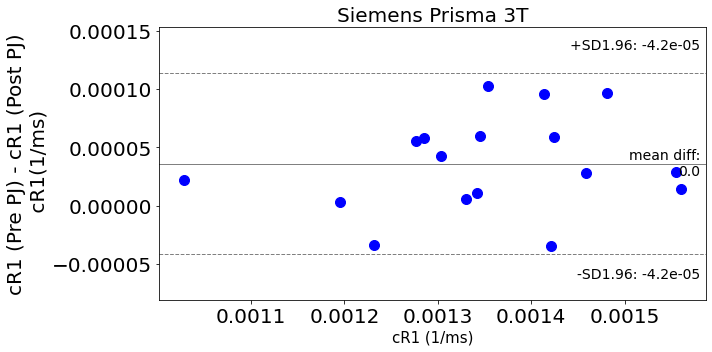

In [12]:
# Bland Altman analysis with Delta R1 for 3T Prisma data
f, ax = plt.subplots(figsize = (10, 5))
sm.graphics.mean_diff_plot(PA["cR1 median (Pre PJ)"], PA["cR1 median (Post PJ)"],  ax = ax, scatter_kwds = {"color":"blue", 's':100})
# ax.set_xlim(500,1300)
# ax.set_ylim(-80,80)
# ax.set_xticks([600, 700, 800, 900, 1000, 1100, 1200])
ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)
# ax.set_yticks([-50, 0, 50])
ax.set_ylabel("cR1 (Pre PJ) - cR1 (Post PJ)\n cR1(1/ms)", fontsize = 20)
ax.set_title("Siemens Prisma 3T", fontsize = 20)
ax.set_xlabel('cR1 (1/ms)')
plt.tight_layout()
#plt.savefig("")

In [16]:
cR1TT_3T = stats.ttest_rel(PA["cR1 median (Pre PJ)"], PA["cR1 median (Post PJ)"])
cR1TT_3T

Ttest_relResult(statistic=3.6345693538550523, pvalue=0.0022302428788300074)

Text(0, 0.5, 'cR1 Pre - cR1 Post')

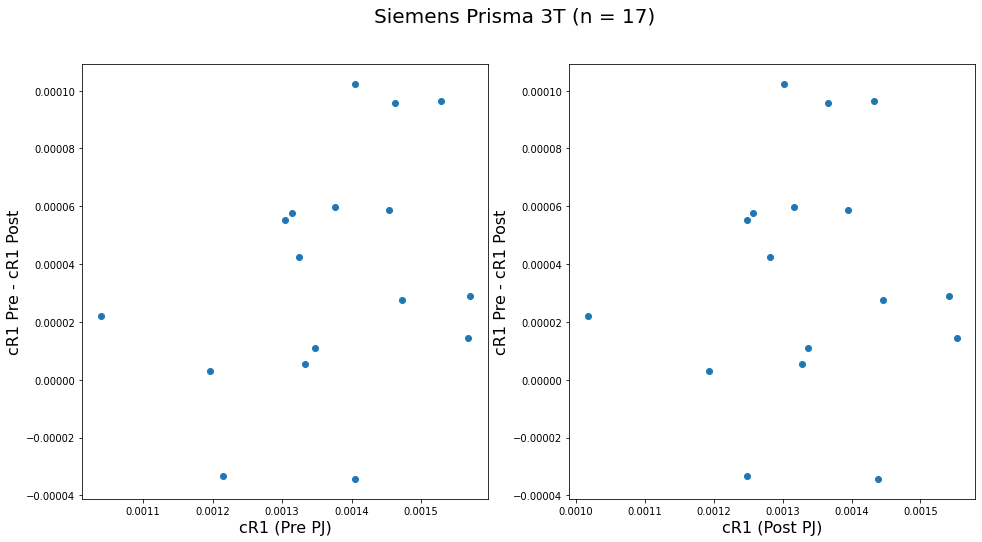

In [26]:
# Delta R1 against native R1
PA['delta R1'] = PA["cR1 median (Pre PJ)"]- PA["cR1 median (Post PJ)"]

fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (16,8))
fig.suptitle('Siemens Prisma 3T (n = 17)', fontsize = 20)

axes[0].scatter(PA["cR1 median (Pre PJ)"], PA['delta R1'])
axes[0].set_xlabel('cR1 (Pre PJ)',  fontsize = 16)
axes[0].set_ylabel("cR1 Pre - cR1 Post", fontsize = 16)

axes[1].scatter(PA["cR1 median (Post PJ)"], PA['delta R1'])
axes[1].set_xlabel('cR1 (Post PJ)',  fontsize = 16)
axes[1].set_ylabel("cR1 Pre - cR1 Post", fontsize = 16)


Text(0, 0.5, 'cR1 (1/ms)')

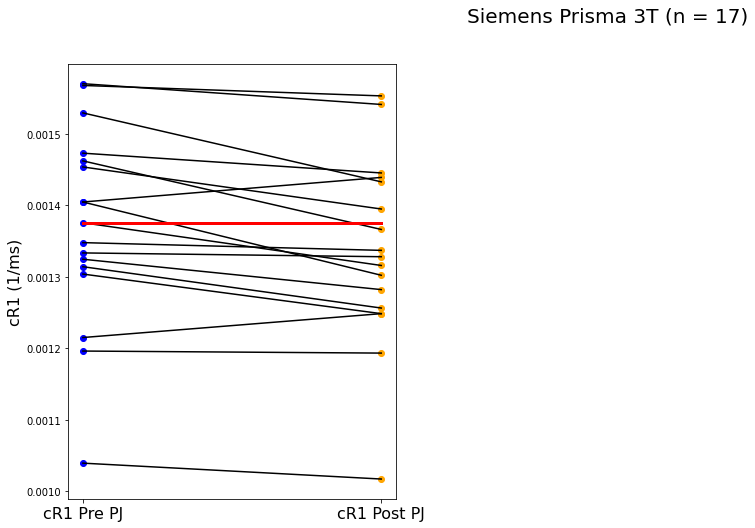

In [36]:
fig = plt.figure(figsize = (20,8))
fig.suptitle("Siemens Prisma 3T (n = 17)", fontsize = 20)

data_length = len(PA["cR1 median (Pre PJ)"])

fig.add_subplot(131)
PrePost(PA["cR1 median (Pre PJ)"], PA["cR1 median (Post PJ)"])
plt.xticks([0,1], ["cR1 Pre PJ", "cR1 Post PJ"], fontsize = 16) 
plt.ylabel("cR1 (1/ms)", fontsize = 16) 

Text(0, 0.5, 'cR1 Pre - cR1 Post')

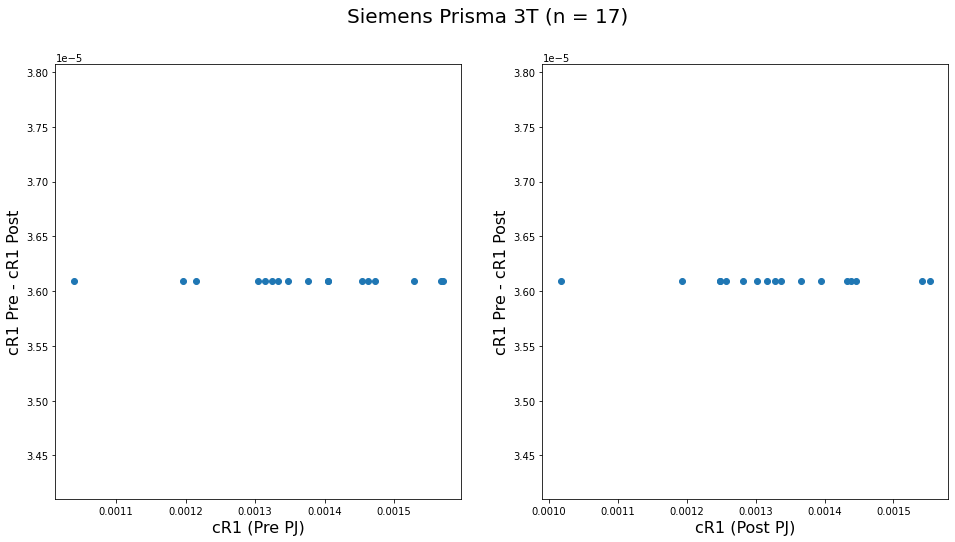

In [32]:
# Delta R1 against native R1
PA['delta R1'] = PA["cR1 median (Pre PJ)"]- PA["cR1 median (Post PJ)"]
PA['mendiff'] = np.mean(PA['delta R1'])

fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (16,8))
fig.suptitle('Siemens Prisma 3T (n = 17)', fontsize = 20)

axes[0].scatter(PA["cR1 median (Pre PJ)"], PA['mendiff'])
axes[0].set_xlabel('cR1 (Pre PJ)',  fontsize = 16)
axes[0].set_ylabel("cR1 Pre - cR1 Post", fontsize = 16)

axes[1].scatter(PA["cR1 median (Post PJ)"], PA['mendiff'])
axes[1].set_xlabel('cR1 (Post PJ)',  fontsize = 16)
axes[1].set_ylabel("cR1 Pre - cR1 Post", fontsize = 16)

##### 1.5T

In [13]:
AV['cR1 median (Pre PJ)'] = 1/AV['cT1 median (Pre PJ)']
AV['cR1 median (Post PJ)'] = 1/AV['cT1 median (Post PJ)']
AV

,Record Id,Portal_ID (Pre PJ),EXP_number (Pre PJ),cT1 median (Pre PJ),Iron median (Pre PJ),PDFF median (Pre PJ),cT1 Q1 (Pre PJ),cT1 Q3 (Pre PJ),Iron Q1 (Pre PJ),Iron Q3 (Pre PJ),PDFF Q1 (Pre PJ),PDFF Q3 (Pre PJ),vendor_model (Pre PJ),field_strength (Pre PJ),Portal_ID (Post PJ),EXP_number (Post PJ),cT1 median (Post PJ),Iron median (Post PJ),PDFF median (Post PJ),cT1 Q1 (Post PJ),cT1 Q3 (Post PJ),Iron Q1 (Post PJ),Iron Q3 (Post PJ),PDFF Q1 (Post PJ),PDFF Q3 (Post PJ),cT1_Ref_Upper_y,cT1_Ref_Lower_y,Iron_Ref_y,PDFF_Ref_y,vendor_model (Post PJ),field_strength (Post PJ),cR1 median (Pre PJ),cR1 median (Post PJ)
1,EXP010_003,9625,EXP010vetygxw,667.0,1.1,6.1,643.0,701.0,1.1,1.2,4.7,7.5,SIEMENSAvanto_ﬁt,.5T,9623,EXP010nzjwutv,661.0,1.0,5.5,640.0,696.0,1.0,1.1,4.1,7.0,633.0,794.0,1.8,5.6,SIEMENSAvanto_ﬁt,.5T,0.001499,0.001513
3,EXP010_005,9818,EXP010vpitawu,826.0,1.0,1.2,793.0,875.0,0.9,1.1,0.1,2.4,SIEMENSAvanto_ﬁt,.5T,9816,EXP010otlxkrz,816.0,1.0,1.6,786.0,867.0,0.9,1.0,0.4,3.1,633.0,794.0,1.8,5.6,SIEMENSAvanto_ﬁt,.5T,0.001211,0.001225
5,EXP010_007,9820,EXP010woaclvx,658.0,1.1,1.3,633.0,699.0,1.0,1.1,0.0,2.8,SIEMENSAvanto_ﬁt,.5T,9814,EXP010ogwfklv,653.0,1.1,1.3,632.0,688.0,1.0,1.1,0.0,2.7,633.0,794.0,1.8,5.6,SIEMENSAvanto_ﬁt,.5T,0.001520,0.001531
7,EXP010_009,9819,EXP010waxoiey,615.0,1.3,1.7,597.0,652.0,1.2,1.3,0.2,3.1,SIEMENSAvanto_ﬁt,.5T,9815,EXP010opqcxxj,621.0,1.4,1.6,600.0,656.0,1.3,1.5,0.0,3.1,633.0,794.0,1.8,5.6,SIEMENSAvanto_ﬁt,.5T,0.001626,0.001610
13,EXP010_016,9938,EXP010xcidtzf,685.0,1.1,2.3,662.0,722.0,1.0,1.1,0.6,4.4,SIEMENSAvanto_ﬁt,.5T,9932,EXP010pkplxry,710.0,1.0,1.9,684.0,753.0,0.9,1.0,0.4,3.8,633.0,794.0,1.8,5.6,SIEMENSAvanto_ﬁt,.5T,0.001460,0.001408
14,EXP010_017,9939,EXP010xhwjezc,666.0,1.2,1.0,646.0,699.0,1.2,1.3,0.0,2.2,SIEMENSAvanto_ﬁt,.5T,9933,EXP010ppzojig,680.0,1.1,1.1,661.0,711.0,1.1,1.1,0.0,2.4,633.0,794.0,1.8,5.6,SIEMENSAvanto_ﬁt,.5T,0.001502,0.001471
15,EXP010_018,9940,EXP010xnqqfxi,733.0,1.1,1.3,710.0,766.0,1.1,1.2,0.1,2.7,SIEMENSAvanto_ﬁt,.5T,9945,EXP010ptkyvkf,753.0,1.1,1.2,732.0,785.0,1.1,1.1,0.0,2.7,633.0,794.0,1.8,5.6,SIEMENSAvanto_ﬁt,.5T,0.001364,0.001328
20,EXP010_023,10141,EXP010yeubkrf,727.0,0.9,2.4,700.0,767.0,0.9,1.0,1.1,3.9,SIEMENSAvanto_ﬁt,.5T,10136,EXP010qfsrhca,735.0,0.9,2.2,711.0,778.0,0.9,1.0,0.8,3.7,633.0,794.0,1.8,5.6,SIEMENSAvanto_ﬁt,.5T,0.001376,0.001361
22,EXP010_025,10156,EXP010ypjqucg,693.0,1.1,5.0,667.0,725.0,1.1,1.2,3.5,6.6,SIEMENSAvanto_ﬁt,.5T,10150,EXP010qopnvaq,725.0,1.1,4.8,701.0,762.0,1.0,1.2,3.4,6.4,633.0,794.0,1.8,5.6,SIEMENSAvanto_ﬁt,.5T,0.001443,0.001379
27,EXP010_030,10723,Exp010Zgntdcr,792.0,1.2,17.0,759.0,836.0,1.2,1.3,15.0,-19.0,SIEMENSAvanto_ﬁt,.5T,10726,Exp010Raztyee,804.0,1.3,17.0,770.0,847.0,1.2,1.3,15.0,-19.0,633.0,794.0,1.8,5.6,SIEMENSAvanto_ﬁt,.5T,0.001263,0.001244


/var/folders/lp/b_vqnmbx63n92ngpptk0k4480000gp/T/ipykernel_27804/2206357034.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([0.0012, 0.00125, 0.0013, 0.00135, 0.0014, 0.00145, 0.0015, 0.00155 ,0.0016], rotation = 45, ha = 'left')


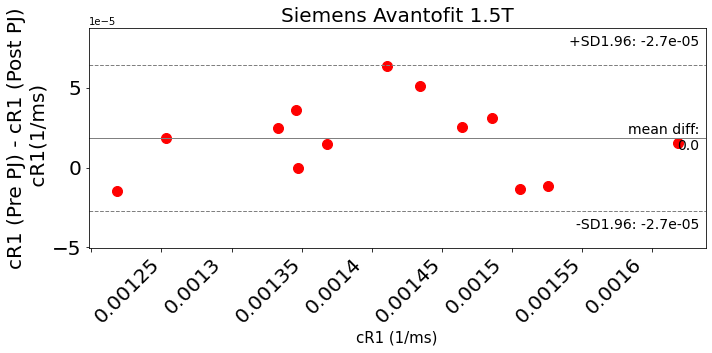

In [14]:
# Bland Altman analysis with Delta R1 for 3T Prisma data
f, ax = plt.subplots(figsize = (10, 5))
sm.graphics.mean_diff_plot(AV["cR1 median (Pre PJ)"], AV["cR1 median (Post PJ)"],  ax = ax, scatter_kwds = {"color":"red", 's':100})
# ax.set_xlim(500,1300)
# ax.set_ylim(-80,80)
ax.set_xticklabels([0.0012, 0.00125, 0.0013, 0.00135, 0.0014, 0.00145, 0.0015, 0.00155 ,0.0016], rotation = 45, ha = 'left')
ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)
# ax.set_yticks([-50, 0, 50])
ax.set_ylabel("cR1 (Pre PJ) - cR1 (Post PJ)\n cR1(1/ms)", fontsize = 20)
ax.set_title("Siemens Avantofit 1.5T", fontsize = 20)
ax.set_xlabel('cR1 (1/ms)')
plt.tight_layout()
#plt.savefig("")

In [18]:
cR1TT_1_5T = stats.ttest_rel(AV["cR1 median (Pre PJ)"], AV["cR1 median (Post PJ)"])
cR1TT_1_5T

Ttest_relResult(statistic=2.76292861050841, pvalue=0.017185646975794847)

Text(0, 0.5, 'cR1 Pre - cR1 Post')

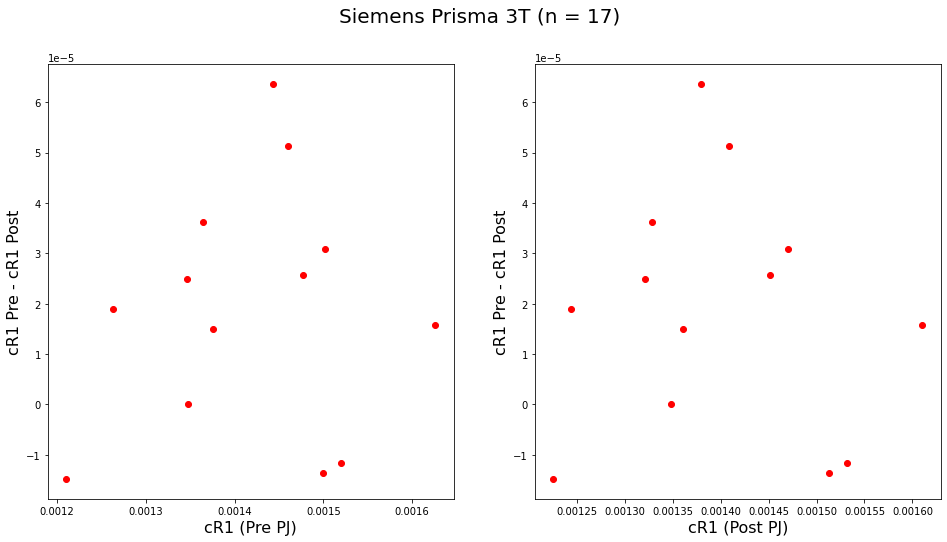

In [29]:
# Delta R1 against native R1
AV['delta R1'] = AV["cR1 median (Pre PJ)"]- AV["cR1 median (Post PJ)"]

fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (16,8))
fig.suptitle('Siemens Prisma 3T (n = 17)', fontsize = 20)

axes[0].scatter(AV["cR1 median (Pre PJ)"], AV['delta R1'], color = 'red')
axes[0].set_xlabel('cR1 (Pre PJ)',  fontsize = 16)
axes[0].set_ylabel("cR1 Pre - cR1 Post", fontsize = 16)


axes[1].scatter(AV["cR1 median (Post PJ)"], AV['delta R1'], color = 'red')
axes[1].set_xlabel('cR1 (Post PJ)',  fontsize = 16)
axes[1].set_ylabel("cR1 Pre - cR1 Post", fontsize = 16)